In [1]:
%matplotlib inline
import pylab as pl
import numpy as np
from astropy import units as u, constants, visualization
visualization.quantity_support()
pl.style.use('dark_background')
pl.rcParams['figure.dpi'] = 150

# Lecture - Line Modeling

 * Physical inference from lines
    * specifically HI spectral lines
 * Uncertainties
 * Model Fitting with Uncertainties

# Spectroscopy lets us measure physical processes

The *amount of light* received from a particular atomic or molecular transition, and the *shape of the profile*, tell us an enormous amount about the physical processes occurring in an object.

## Spectra tell us how much of each element is present
<img style='max-height:70%' src="https://supernova.lbl.gov/~dnkasen/tutorial/graphics/sn_types.jpg">
from <a href="https://supernova.lbl.gov/~dnkasen/tutorial/">Daniel Kasen's Supernova page</a>

## Line profiles tell us about the geometry of moving material
<img style='' src="https://astrobites.org/wp-content/uploads/2011/01/pcygni_form1.jpg">
via <a href="https://astrobites.org/2011/01/26/variability-of-massive-stars/">astrobites</a>

## Nebular line ratios probe physical conditions
"Thermometers" and "Densitometers"

<div style="font-size: 50%">(in this plot, the curves represent observed values)</div>

<img src="http://research.iac.es/proyecto/PyNeb//images/smc24.png">
from <a href="http://research.iac.es/proyecto/PyNeb//">pyneb</a>

# Measurements

We can make several measurements from the spectra we've obtained:

1. The frequency of the line
2. The intensity of the line

# Line Profiles

So what is a "spectral line" anyway?

The HI spin-flip transition is a quantum process that produces a photon at a specific frequency, and it *always* produces a photon at that frequency - in the rest frame of the particle. 

# Line Profiles - Doppler Shift

The "line profile" we observe is caused by *doppler shift* in the line center.

The Doppler formula (in the "radio convention" approximation) is:

$$ \frac{\Delta v}{c} = \frac{\nu_{rest} - \nu_{observed}}{\nu_{rest}} $$

# Line Profiles - Doppler Shift

What causes $\nu_{observed}$ to vary, then?

Often the most important process is *thermal broadening*.

Particles in a gas move according to the Maxwell-Boltzmann Distribution

# Maxwell-Boltzmann distribution

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/82/Simulation_of_gas_for_relaxation_demonstration.gif/450px-Simulation_of_gas_for_relaxation_demonstration.gif" style="max-height: 600px">

from wikipedia

# Line Profiles - Maxwell-Boltzmann Distribution

The Maxwell-Boltzmann velocity vector distribution tells you how fast a particle is moving along your line-of-sight.  

$$c_s = \sqrt{\frac{k_B T}{m}}$$

$k_B$ is Boltzmann's constant, $T$ is the gas temperature, and $m$ is the particle mass.  $c_s$ is the *speed of sound*, and is the width of the Boltzmann velocity distribution for an isothermal (single-temperature) gas. 

The Maxwell-Boltzmann distribution is a probability distribution.  The probability that a particle is moving at a given velocity along our line of sight $v_{los}$ is:

$$p(v_{los}) = \exp\left[\frac{-v_{los}^2}{2 c_s^2}\right] = \exp\left[\frac{-m v_{los}^2}{2 k_B T}\right]$$

# Line Profiles - Maxwell-Boltzmann Distribution

This is a Gaussian distribution, $f(x) \propto e^{-x^2}$:

$$p(v_{los}) = \exp\left[\frac{-v_{los}^2}{2 c_s^2}\right]$$

It tells you how many particles are moving at each velocity.  For example...

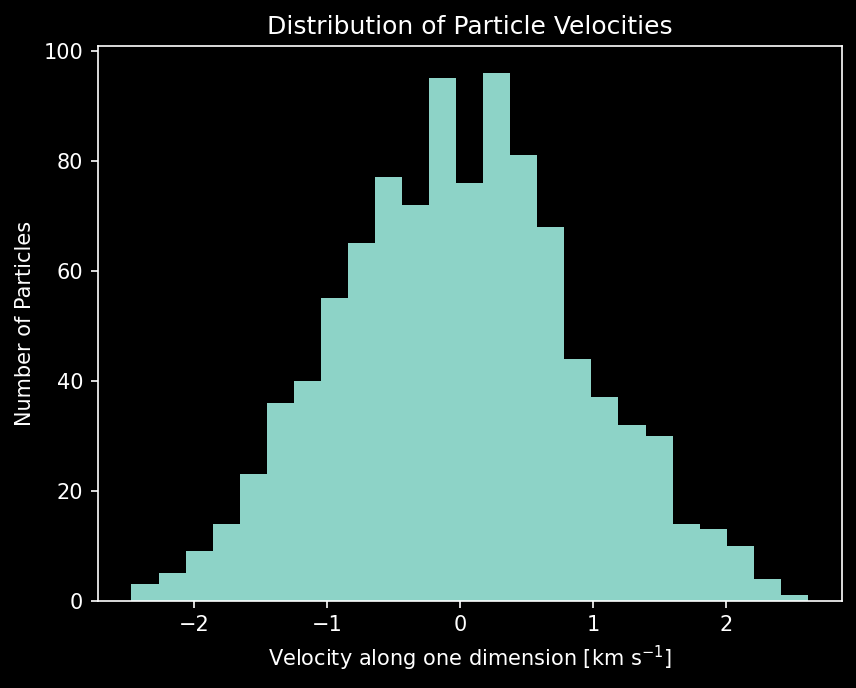

In [2]:
# Example: There are 1000 Hydrogen particles with T=100 K
temperature = 100*u.K
hydrogen_mass = 1*u.Da # a "Dalton" is equal to one Atomic Mass Unit
soundspeed = ((constants.k_B * temperature / hydrogen_mass)**0.5).to(u.km/u.s)
# sample particle velocities from a "normal" (Gaussian) distribution
particle_velocities = np.random.randn(1000) * soundspeed
pl.hist(particle_velocities, bins=25);
pl.title("Distribution of Particle Velocities")
pl.ylabel("Number of Particles")
pl.xlabel("Velocity along one dimension [km s$^{-1}$]");

# Line Profiles - Doppler Shift

A moving particle produces a photon at a different frequency as determined by the doppler formula:

$$ \frac{\Delta v}{c} = \frac{\nu_{rest} - \nu_{moving}}{\nu_{rest}} $$

gives

$$ \nu_{moving} = \nu_{rest} \left(1 - \frac{\Delta v}{c}\right) $$

# Line Profiles - Doppler Shift
The doppler formula 
$$ \frac{\Delta v}{c} = \frac{\nu_{rest} - \nu_{moving}}{\nu_{rest}} =  \frac{\nu_{rest} - \nu_{los}}{\nu_{rest}} $$
combined with the Boltzmann distribution
$$p(v_{los}) = \exp\left[\frac{-v_{los}^2}{2 c_s^2}\right]$$
 gives $p(\nu_{los})$ [note change of variable]:

$$ p(\nu_{los}) =  \exp\left[\frac{-\left[c(\nu_{rest}-\nu_{los})/\nu_{rest}\right]^2}{2 c_s^2}\right] $$


# Line Profiles - Doppler Shift

This is the line profile produced by an isothermal gas:

$$ p(\nu_{los}) =  \exp\left[\frac{-\left[c (\nu_{rest}-\nu_{los})/( \nu_{rest})\right]^2}{2 c_s^2}\right] $$


In [3]:
# a simulated line profile
nu_hi = 1420.405751 * u.MHz
bandwidth = 2.5 * u.MHz
frequency_axis = np.linspace(nu_hi - bandwidth/2, nu_hi + bandwidth/2, 2048)
# assume we're measuring something in Janskys
model_line_profile = np.exp(-(constants.c * (nu_hi - frequency_axis)/(nu_hi * soundspeed ))**2 / 2) * u.Jy

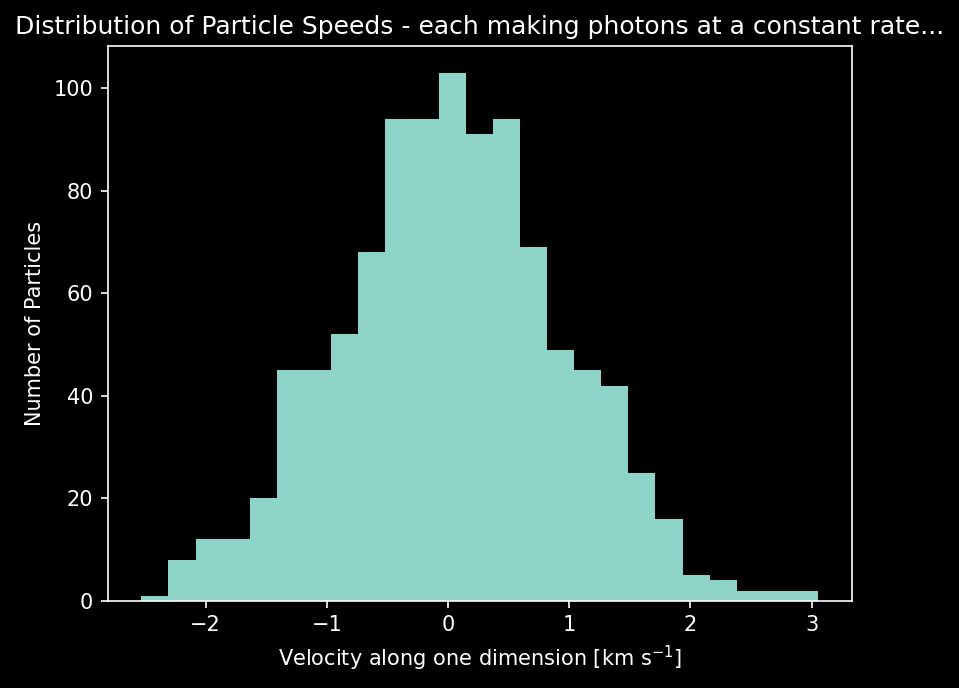

In [4]:
# Example: There are 1000 Hydrogen particles with T=100 K
temperature = 100*u.K
hydrogen_mass = 1*u.Da # a "Dalton" is equal to one Atomic Mass Unit
soundspeed = ((constants.k_B * temperature / hydrogen_mass)**0.5).to(u.km/u.s)
# sample particle velocities from a "normal" (Gaussian) distribution
particle_velocities = np.random.randn(1000) * soundspeed
pl.hist(particle_velocities, bins=25);
pl.title("Distribution of Particle Speeds - each making photons at a constant rate...")
pl.ylabel("Number of Particles")
pl.xlabel("Velocity along one dimension [km s$^{-1}$]");

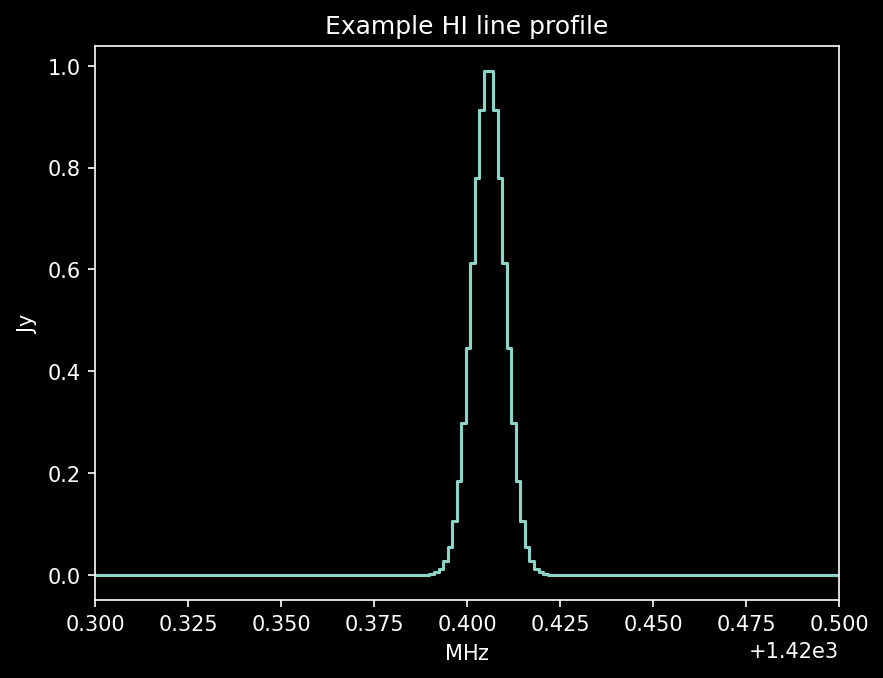

In [5]:
pl.plot(frequency_axis, model_line_profile, drawstyle='steps-mid')
pl.xlim(1420.3,1420.5);
pl.title("Example HI line profile");

# Moment Analysis - Physical inference

What do the various moments tell us about the thing we're looking at?

Moment 0 is the integrated intensity.  It's how much light we get.

Moment 1 is the line-of-sight velocity.  It's the average velocity of the particles (along the line of sight)

# Moment Analysis - Physical inference

Moment 2 is related to the *line width*, which in turn relates to the temperature (if the line is only thermally broadened).
$$ c_s = \sigma_v = \sqrt{\frac{k_B T}{m_H}} $$
We can therefore use the linewidth to measure the temperature.

We can solve that equation for the temperature $T$ to get:
$$ T = \frac{\sigma_v^2 m_H}{k_B} = \frac{m_{2,v} m_H}{k_B} $$

But, in the previous lecture on moments, we measured $\sigma_\nu$, the width in frequency.  
$$ \frac{\sigma_\nu}{\nu} = \frac{\sigma_v}{c}$$

So, we solve for $\sigma_v = c \sigma_\nu / \nu$ and plug in...
$$ T = \frac{\sigma_v^2 m_H}{k_B} = \frac{\sigma_\nu^2 c^2 m_H}{\nu^2 k_B} = \frac{m_{2,\nu} c^2 m_H}{\nu^2 k_B} $$

We now have $T(\sigma_\nu)$ or $T(m_{2,\nu})$
$$ T = \frac{\sigma_\nu^2 c^2 m_H}{\nu^2 k_B} = \frac{m_{2,\nu} c^2 m_H}{\nu^2 k_B} $$
and can use it:

In [6]:
# restored from another lecture
delta_nu = frequency_axis[1] - frequency_axis[0]
moment0 = (model_line_profile * delta_nu).sum()
moment1 = (frequency_axis * model_line_profile * delta_nu).sum() / moment0
moment2 = ( (frequency_axis - moment1)**2 * model_line_profile * delta_nu).sum() / moment0

In [7]:
print(f"Measured moment2=")
moment2

Measured moment2=


<Quantity 1.86645543e-05 MHz2>

In [8]:
temperature_measured = (moment2 * hydrogen_mass * constants.c**2 / 
                        (nu_hi**2 * constants.k_B)).to(u.K)
temperature_measured

<Quantity 100. K>

So we've recovered the temperature!

# Moment Analysis - Physical inference

This sort of measurement is at the heart of remote sensing and astrophysical spectroscopy:



From measuring properties of an emission line, the photons produced by a gas, we can infer the *local properties* of that gas.



We can "take the temperature" of a gas cloud anywhere in the universe just by measuring simple properties of its emitted spectrum!



(of course, we made some simplifying assumptions; for cold gas, usually the line width is broader than thermal)

# Line Profile Measurements - what about noise?

Even in the presence of noise, moment analysis is very effective - but it can go awry.

In [9]:
np.random.seed(0)
uncertainty = 0.1 * model_line_profile.unit
noisy_model_profile = model_line_profile + uncertainty * np.random.randn(model_line_profile.size)

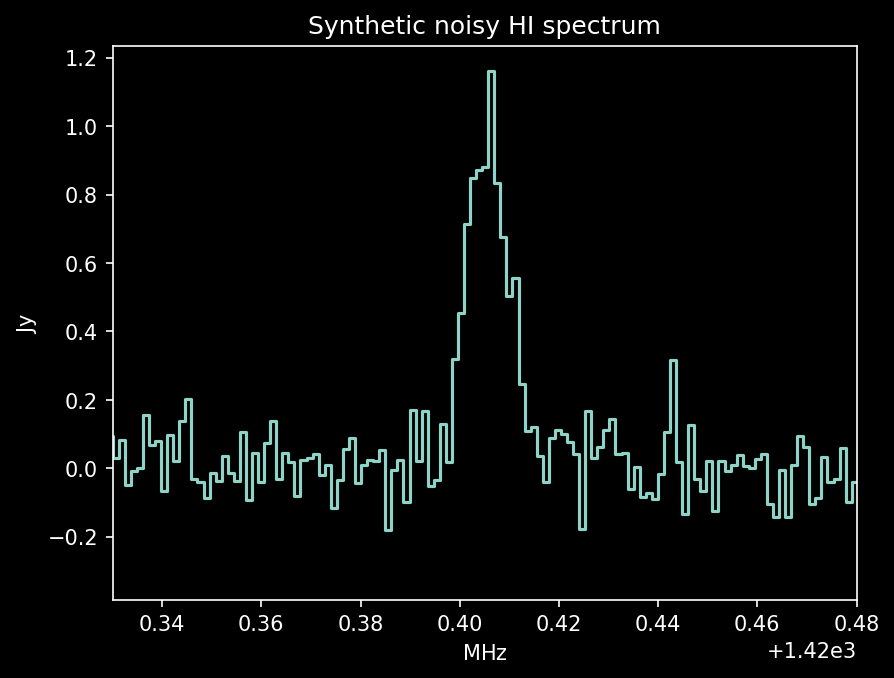

In [10]:
pl.title("Synthetic noisy HI spectrum")
pl.plot(frequency_axis, noisy_model_profile, drawstyle='steps-mid')
pl.xlim(1420.33,1420.48);

In [11]:
# Calculate all the moments of the noisy spectrum
noisy_moment0 = noisy_model_profile.sum() * delta_nu
noisy_moment1 = (frequency_axis * noisy_model_profile * delta_nu).sum() / noisy_moment0
noisy_moment2 = ( (frequency_axis - noisy_moment1)**2 *
                 noisy_model_profile * delta_nu).sum() / noisy_moment0
noisy_sigma = noisy_moment2**0.5
noisy_moment0, noisy_moment1, noisy_moment2, noisy_sigma

/Users/adam/mambaforge/envs/py312/lib/python3.12/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


(<Quantity 0.00707108 Jy MHz>,
 <Quantity 1420.86404663 MHz>,
 <Quantity -0.43715543 MHz2>,
 <Quantity nan MHz>)

What happened?

  The centroid is wrong (1420.86 MHz is far from the correct center, 1420.4058 MHz) because the noise won out over the signal.


If we re-measure over a subset... if we "crop" the spectrum.... we can get a reasonable answer again:

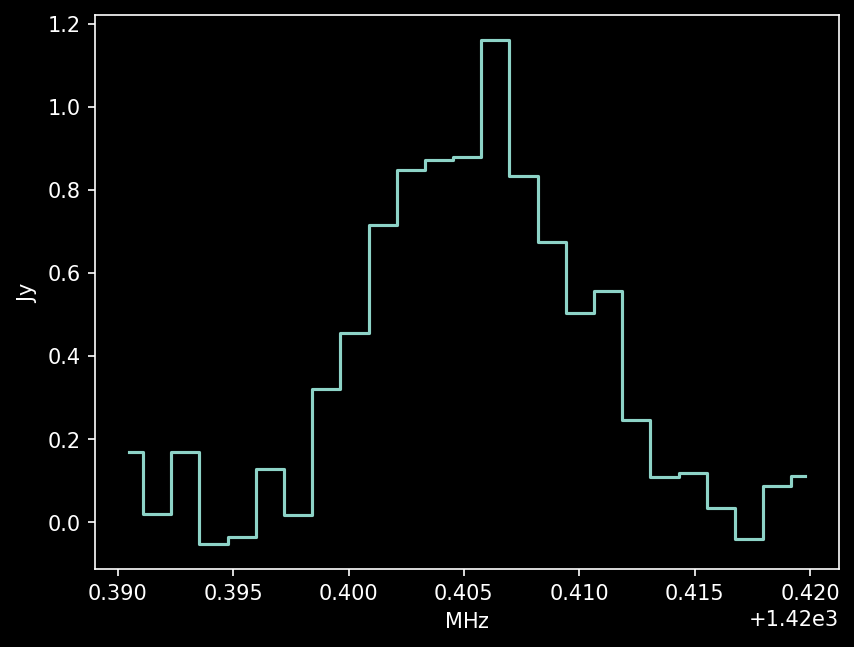

In [12]:
selection = ((frequency_axis > 1420.39 * u.MHz) &
             (frequency_axis < 1420.42*u.MHz))
pl.plot(frequency_axis[selection],
        noisy_model_profile[selection], drawstyle='steps-mid');

In [13]:
noisy_moment0 = noisy_model_profile[selection].sum() * delta_nu
noisy_moment1 = (frequency_axis[selection] * noisy_model_profile[selection] * delta_nu).sum() / noisy_moment0
noisy_moment2 = ( (frequency_axis[selection] - noisy_moment1)**2 * noisy_model_profile[selection] * delta_nu).sum() / noisy_moment0
noisy_sigma = noisy_moment2**0.5
noisy_moment0, noisy_moment1, noisy_moment2, noisy_sigma

(<Quantity 0.01088147 Jy MHz>,
 <Quantity 1420.40551509 MHz>,
 <Quantity 2.4993493e-05 MHz2>,
 <Quantity 0.00499935 MHz>)

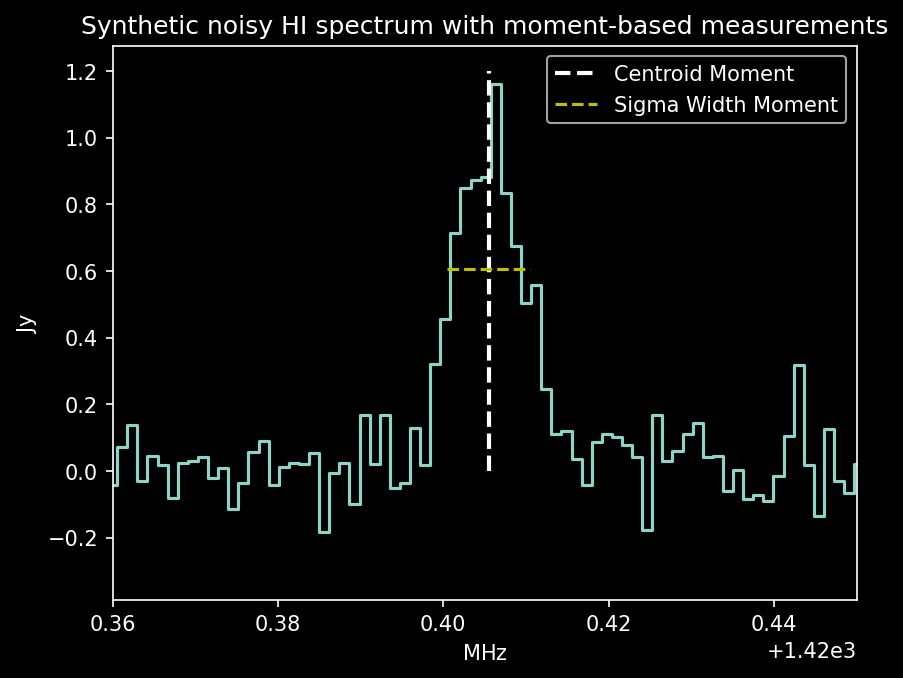

In [14]:
pl.title("Synthetic noisy HI spectrum with moment-based measurements")
pl.plot(frequency_axis, noisy_model_profile, drawstyle='steps-mid')
pl.xlim(1420.36,1420.45)
pl.vlines(noisy_moment1, 0*u.Jy, 1.2*u.Jy, color='w', linestyle='--', linewidth=2, label='Centroid Moment')
# the Gaussian width is the half-width at exp(-1/2)
pl.hlines(np.exp(-0.5), noisy_moment1-noisy_sigma, noisy_moment1+noisy_sigma, color='y', linestyle='--', label="Sigma Width Moment");
pl.legend(loc='best');

Revisiting our temperature measurement, but now including the noise:

In [15]:
moment2_v = (moment2 / nu_hi**2) * constants.c**2
noisy_moment2_v = (noisy_moment2 / nu_hi**2) * constants.c**2
temperature_measured = (moment2_v * hydrogen_mass / constants.k_B).to(u.K)
noisy_temperature_measured = (noisy_moment2_v * hydrogen_mass / constants.k_B).to(u.K)
temperature_measured, noisy_temperature_measured

(<Quantity 100. K>, <Quantity 133.90886615 K>)

We still recover the temperature, though with an offset of  ~30%

# Moment analysis - what about uncertainty?

We need to know what the uncertainty is on our measurements.  The uncertainty for these calculations follows the same sum-in-quadrature as with other Gaussian-noise-affected measurements.

# Error Propagation rules
Reminder: you can look these up https://en.wikipedia.org/wiki/Propagation_of_uncertainty#Example_formulae

$$f = a A \rightarrow \sigma_f^2 = a^2 \sigma_A^2$$
$$f = A + B \rightarrow \sigma_f^2 = \sigma_A^2 + \sigma_B^2$$
$$f = A B \rightarrow \frac{\sigma_f^2}{f^2} = \frac{\sigma_A^2}{A^2} + \frac{\sigma_B^2}{B^2}$$
$$f = A / B \rightarrow \frac{\sigma_f^2}{f^2} = \frac{\sigma_A^2}{A^2} + \frac{\sigma_B^2}{B^2}$$

where these versions ignore correlation between $A$ and $B$

# Moment 0 error

We take as a given that we have an error per channel $\sigma_S$ on the signal $S_\nu$

We want to know the uncertainty on moment 0, $\sigma_{m_0}$, for $ m_0 = \Sigma S_\nu \Delta \nu $

We use the Gaussian error propagation formula.
For $z=x+y$, $\sigma^2_z = \sigma_x^2 + \sigma_y^2$.

Our uncertainty is, assuming a uniform noise (every channel / pixel has the same uncertainty) $\sigma_S$:

$$ \sigma_{m_0}^2 = \Sigma \sigma_S^2 (\Delta \nu)^2 = N (\Delta \nu)^2 \sigma_S^2 $$

where $N$ is the number of channels.

In [16]:
# noise estimate will be described more later; we're using this as our \sigma_S
noise_estimate = np.std(noisy_model_profile[~selection])

noisy_moment0 = (noisy_model_profile[selection] * delta_nu).sum()
Npts = noisy_model_profile[selection].size
noisy_moment0_uncertainty = (Npts * delta_nu**2 * (noise_estimate**2))**0.5
f"m0 = {noisy_moment0:0.3f} +/- {noisy_moment0_uncertainty:0.3f}"

'm0 = 0.011 Jy MHz +/- 0.001 Jy MHz'

# Moment 1 error


$$ m_1 = \frac{\Sigma \nu S_\nu \Delta \nu}{m_0} $$

There is no uncertainty on $\nu$ - we know exactly what frequency each bin is (at least, relative to each other bin).

The propagation of uncertainty formulae come from Taylor expansion around the central moment, so when we calculate the uncertainty, we subtract off the central frequency first.

i.e., we replace $\nu$ with $\nu-\nu_{center}$, or because we estimate $\nu_{center} = m_1$, we replace with $\nu-m_1$



$$ m_{1, central} = \frac{\Sigma (\nu-m_1) S_\nu \Delta \nu}{m_0} $$


For an equation like $z = y/x$, we use $ \frac{\sigma_z^2}{z^2} = \frac{\sigma_y^2}{y^2} + \frac{\sigma_x^2}{x^2}$ to propagate error, where $y$ is the numerator and $x$ is the denominator.





$$ \sigma_{numerator}^2 = \Sigma (\nu-m_1)^2 \sigma_S^2 (\Delta \nu)^2 $$

and $\sigma_{denominator} = \sigma_{m_0}$, so we get (skipping algebra, which is on a sub-slide):

$$\sigma_{m_1}^2 =  \left(\frac{\Sigma (\nu-m_1)^2  (\Delta \nu)^2 \sigma_S^2}{m_0^2}  +
   \frac{\sigma_{m_0}^2 \left[\Sigma (\nu-m_1) S_\nu (\Delta \nu)\right]^2}{m_0^4} \right)$$


$$\frac{\sigma_{m_1}^2}{m_1^2} = \frac{\sigma_{numerator}^2}{numerator^2} + \frac{\sigma_{denominator}^2}{denominator^2}$$
$$\frac{\sigma_{m_1}^2}{m_1^2} = \frac{\Sigma (\nu-m_1)^2 \sigma_S^2 (\Delta \nu)^2}{(\Sigma (\nu-m_1) S_\nu \Delta \nu)^2} + \frac{\sigma_{m_0}^2}{m_0^2}$$
$$\sigma_{m_1}^2 = m_1^2 \left(\frac{\Sigma (\nu-m_1)^2 \sigma_S^2 (\Delta \nu)^2}{(\Sigma (\nu-m_1) S_\nu \Delta \nu)^2} + \frac{\sigma_{m_0}^2}{m_0^2}\right)$$
$$\sigma_{m_1}^2 = \left[\frac{\Sigma (\nu-m_1) S_\nu \Delta \nu}{m_0} \right]^2 \left(\frac{\Sigma (\nu-m_1)^2 \sigma_S^2 (\Delta \nu)^2}{(\Sigma (\nu-m_1) S_\nu \Delta \nu)^2} + \frac{\sigma_{m_0}^2}{m_0^2}\right)$$
$$\sigma_{m_1}^2 =  \left(\frac{\Sigma (\nu-m_1)^2  (\Delta \nu)^2 \sigma_S^2}{m_0^2}  +
   \frac{\sigma_{m_0}^2 \left[\Sigma (\nu-m_1) S_\nu (\Delta \nu)\right]^2}{m_0^4} \right)$$

In [17]:
left_term = ((delta_nu * noise_estimate *
              (frequency_axis[selection] - noisy_moment1))**2).sum() / noisy_moment0**2
right_term = (noisy_moment0_uncertainty**2 *
              (((frequency_axis[selection] - noisy_moment1) * 
                noisy_model_profile[selection] * delta_nu)).sum()**2) / noisy_moment0**4
noisy_moment1_uncertainty = (left_term + right_term)**0.5
    
f"m1 = {noisy_moment1:0.4f} +/- {noisy_moment1_uncertainty:0.4f}"

'm1 = 1420.4055 MHz +/- 0.0005 MHz'

That formula is tedious to write, so we make it into a function:

In [18]:
def moment1_uncertainty(xaxis, data, uncertainty):
    # all channels have the same width, so we can use channel 1 - channel 0:
    deltax = xaxis[1] - xaxis[0]
    moment0 = (data * deltax).sum()
    moment0_uncertainty = (len(data) * deltax**2 * (uncertainty**2))**0.5
    moment1 = (data * xaxis * deltax).sum() / moment0
    left_term = ((deltax * uncertainty * (xaxis - moment1))**2).sum() / moment0**2
    right_term = (moment0_uncertainty**2 *
                  (((xaxis - moment1) * data * deltax)).sum()**2) / moment0**4
    moment1_uncertainty = (left_term + right_term)**0.5
    return moment1, moment1_uncertainty

In [19]:
moment1_uncertainty(xaxis=frequency_axis[selection], 
                    data=noisy_model_profile[selection],
                    uncertainty=noise_estimate)

(<Quantity 1420.40551509 MHz>, <Quantity 0.00048365 MHz>)

# Moment 2 error
$$m_2 = \frac{\Sigma \left(\nu - m_1\right)^2 S_\nu \Delta \nu}{m_0}$$



We just invoke symmetry here (in other words, I cheated on the algebra, but it's a fair cheat) and replace all $\nu$ (or $\nu-m_1$) terms in $\sigma_{m_1}$ with $\nu^2$.



$$\sigma_{m_2}^2 =  \left(\frac{\Sigma (\nu-m_1)^4  (\Delta \nu)^2 \sigma_S^2}{m_0^2}  +
   \frac{\sigma_{m_0}^2 \left[\Sigma (\nu-m_1)^2 S_\nu (\Delta \nu)\right]^2}{m_0^4} \right)$$
   $$\sigma_{m_2}^2 =  \left(\frac{\Sigma (\nu-m_1)^4  (\Delta \nu)^2 \sigma_S^2}{m_0^2}  +
   \frac{\sigma_{m_0}^2 m_2^2}{m_0^2} \right)$$

In [20]:
left_term = ((delta_nu * noise_estimate * (frequency_axis[selection] - noisy_moment1)**2)**2).sum() / noisy_moment0**2
right_term = (noisy_moment0_uncertainty**2 * (((frequency_axis[selection] - noisy_moment1)**2 * 
                                              noisy_model_profile[selection] * delta_nu)**2).sum()) / noisy_moment0**4
noisy_moment2_uncertainty = (left_term + right_term)**0.5
    
f"m2 = {noisy_moment2**0.5:0.4f} +/- {noisy_moment2_uncertainty**0.5:0.4f}"

'm2 = 0.0050 MHz +/- 0.0024 MHz'

In [21]:
# again, simplify this into a function
def moment2_uncertainty(xaxis, data, uncertainty):
    deltax = xaxis[1] - xaxis[0]
    moment0 = (data * deltax).sum()
    moment0_uncertainty = (len(data) * deltax**2 * (uncertainty**2))**0.5
    moment1 = (data * xaxis * deltax).sum() / moment0
    moment2 = ((xaxis-moment1)**2 * deltax * data).sum() / moment0
   
    left_term = ((deltax * uncertainty * (xaxis - moment1)**2)**2).sum() / moment0**2
    right_term = (moment0_uncertainty**2 *
                  moment2**2) / moment0**2
    moment2_uncertainty = (left_term + right_term)**0.5
    return moment2, moment2_uncertainty

In [22]:
# calculate the moment 2 value and its uncertainty using the function we just defined
m2,m2u = moment2_uncertainty(frequency_axis[selection], noisy_model_profile[selection], noise_estimate)
f"m2 = {m2**0.5:0.4f} +/- {m2u**0.5:0.4f}"

'm2 = 0.0050 MHz +/- 0.0024 MHz'

# Summarizing moment uncertainties

In [23]:
# print the results of all the previous cells
print(f"m0 = {noisy_moment0:0.4f} +/- {noisy_moment0_uncertainty:0.4f}, S/N={noisy_moment0/noisy_moment0_uncertainty:0.1f}")
print(f"m1 = {noisy_moment1:0.4f} +/- {noisy_moment1_uncertainty:0.4f}")
print(f"m2 = {noisy_moment2:0.4g} +/- {noisy_moment2_uncertainty:0.4g}")
print(f"sqrt(m2) = {noisy_moment2**0.5:0.4f} +/- {noisy_moment2_uncertainty**0.5:0.4f}")

m0 = 0.0109 Jy MHz +/- 0.0006 Jy MHz, S/N=18.2
m1 = 1420.4055 MHz +/- 0.0005 MHz
m2 = 2.499e-05 MHz2 +/- 5.735e-06 MHz2
sqrt(m2) = 0.0050 MHz +/- 0.0024 MHz


Note there is an asymmetry here: moment 0 has a signal-to-noise of about 20, moment 2 has a signal-to-noise of about 2, but moment1 appears to have a HUGE signal-to-noise ratio.  That's not really right, because what we're actually measuring is the deviation from moment1.  Moment 1 makes more sense if expressed in velocity...

In [24]:
# look back at moment 1: the uncertainty is bigger when you compare to how far it is from center
# (we measure the error on the central moment)
m1_velocity = (nu_hi - noisy_moment1) / nu_hi * constants.c
m1_velocity_uncertainty = noisy_moment1_uncertainty / nu_hi * constants.c
print(f"m1 = {m1_velocity:0.1f} +/- {m1_velocity_uncertainty:0.1f}")

m1 = 49.8 m / s +/- 102.1 m / s


This measurement now appears to have S/N < 1 - that's telling us that our measured moment 1 is consistent with zero velocity.  That makes sense, since the input model has zero velocity!

# Moment Analysis - Physical inference *with uncertainty*

The temperature is, from above:
$$ T = \frac{\sigma_v^2 m_H}{k_B} = \frac{m_{2,v} m_H}{k_B} = \frac{m_{2,\nu} m_H c^2}{k_B \nu^2}$$

In [25]:
# estimate of the temperature and uncertainty on the temperature
noisy_temperature_measured = (noisy_moment2 * constants.c**2 * hydrogen_mass / (nu_hi**2 * constants.k_B)).to(u.K)
noisy_temperature_uncertainty = (noisy_moment2_uncertainty * constants.c**2 * hydrogen_mass / (nu_hi**2 * constants.k_B)).to(u.K)
print(f"T = {noisy_temperature_measured:0.1f} +/- {noisy_temperature_uncertainty:0.1f}")

T = 133.9 K +/- 30.7 K


# Moment Analysis - baselines

Where can moment analysis go really wrong?

If you have a background continuum, none of this works!  We call removing the continuum "baseline subtraction".

We'll dig into baselines more now as it's important for the cases we're dealing with.

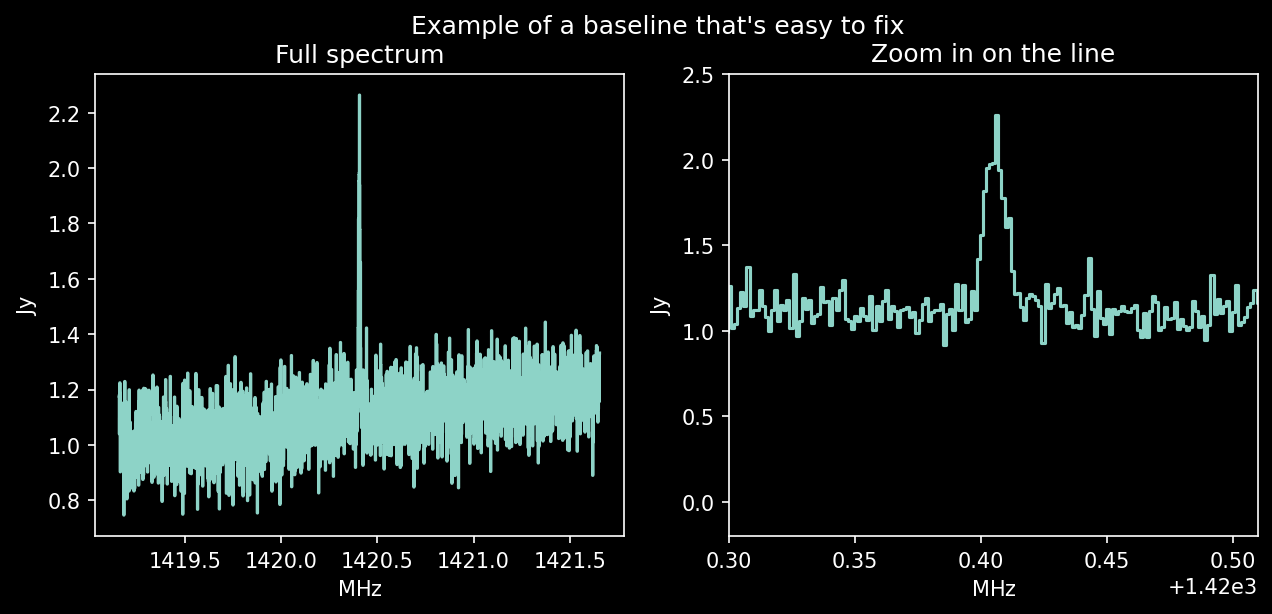

In [26]:
noisy_baseline_model_profile = noisy_model_profile + np.poly1d([0.0001,1],r=False)(np.arange(frequency_axis.size))*noisy_model_profile.unit
pl.figure(figsize=(10,4))
pl.suptitle("Example of a baseline that's easy to fix")
pl.subplot(1,2,1).plot(frequency_axis, noisy_baseline_model_profile,
        drawstyle='steps-mid')
pl.title("Full spectrum")
pl.subplot(1,2,2).plot(frequency_axis, noisy_baseline_model_profile,
        drawstyle='steps-mid')
pl.title("Zoom in on the line")
pl.xlim(1420.3,1420.51)
pl.ylim(-0.2,2.5);

Why is the baseline a problem?
$$ m_0 = \Sigma  S_\nu \Delta \nu $$
$$ m_1 = \frac{\Sigma \nu S_\nu \Delta \nu}{m_0} $$
$$ m_2 = \frac{\Sigma \nu^2 S_\nu \Delta \nu}{m_0} $$
All of these moments include the flux at each pixel, so if there's a gradient in the flux, it biases the measurement.

In [27]:
# hackery to make a bad baseline example
# (you don't need to pay close attention to this for now)
np.random.seed(2)
x = np.poly1d([1,2,3] + list(np.random.randn(25)))(np.linspace(-5,5,frequency_axis.size))
x = np.abs(np.fft.fft(x)) / x.sum()
x[0:18] = 0
bad_baseline = np.abs(np.fft.fft(x)) * model_line_profile.unit
noisy_bad_baseline_model_profile = noisy_model_profile + bad_baseline

# Real Bad Baselines

In real life, bad baselines can be really bad, and important (and difficult) to deal with...

<img src="images/41550_2020_1174_Fig9_ESM.webp">

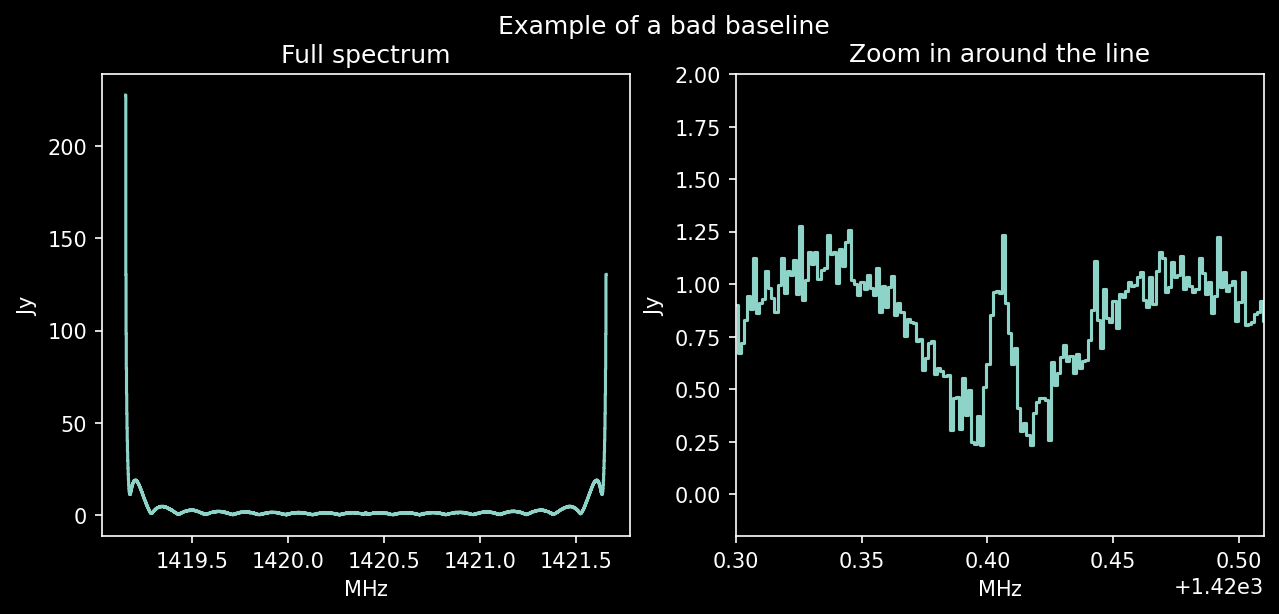

In [28]:
pl.figure(figsize=(10,4))
pl.suptitle("Example of a bad baseline")
pl.subplot(1,2,1).plot(frequency_axis, noisy_bad_baseline_model_profile,
        drawstyle='steps-mid')
pl.title("Full spectrum")
pl.subplot(1,2,2).plot(frequency_axis, noisy_bad_baseline_model_profile,
        drawstyle='steps-mid')
pl.title("Zoom in around the line")
pl.xlim(1420.3,1420.51)
pl.ylim(-0.2,2.);

## What do we do about bad baselines?

Generally, we try to model and remove them.  

This can be difficult and can result in fake features in the data, so it helps to know what fake features look like.


When you take spectra with the resistor attached, or with the antenna not attached, it is telling you what the instrumental features look like.

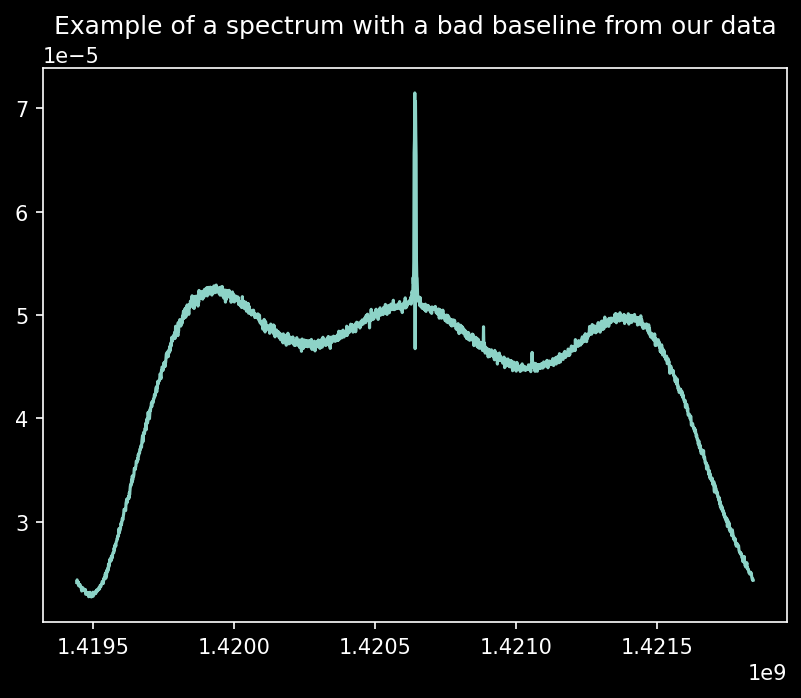

In [29]:
from astropy import table
tbl = table.Table.read('data/psd_200918_140757_tint60s_sdr0_fsw50ohm_on_calibration_60s.fits')
pl.plot(tbl['freq1'], tbl['power1'])
pl.title("Example of a spectrum with a bad baseline from our data");

We're just noting baselines as a problem now - we'll come back to how to subtract them in a few slides.

# Model Fitting

The next level approach is to fit a model to the data.

Our model is a "predictive" or "generative" model.

When fitting the model to data, in the "classical" approach, we treat the uncertainty-per-pixel as a weight.

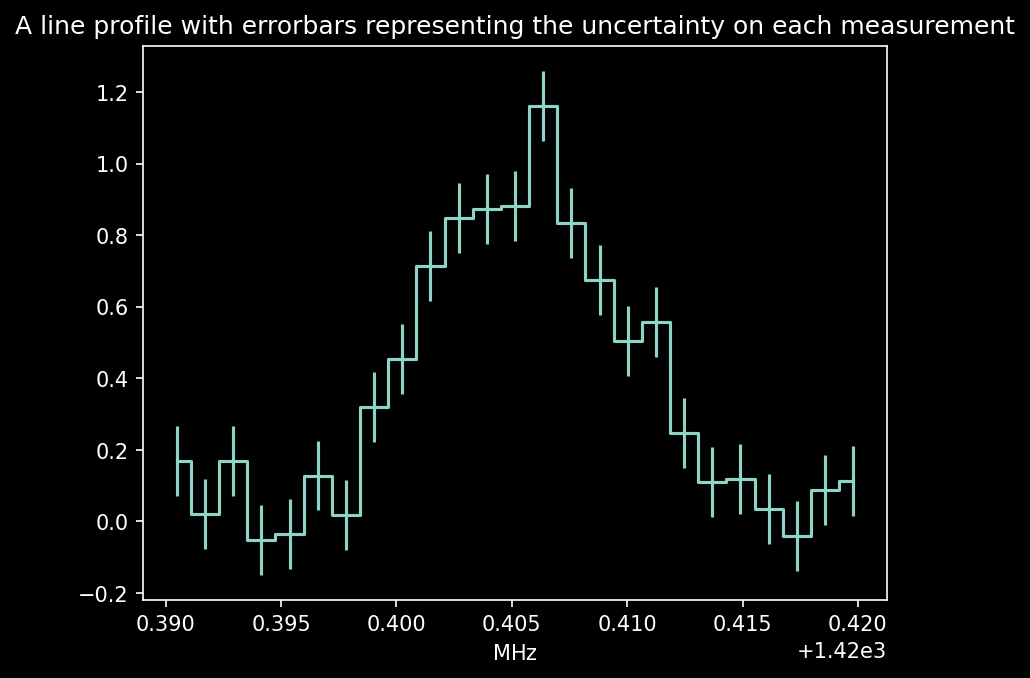

In [30]:
# a line profile with errorbars on the data points
pl.errorbar(frequency_axis[selection], noisy_model_profile[selection].value,
            drawstyle='steps-mid', yerr=noise_estimate.value)
pl.title("A line profile with errorbars representing the uncertainty on each measurement");

# Model Fitting

Astropy provides the tools for this.  Programming your own fitting (optimization) routine is very challenging, so we use existing libraries.

https://docs.astropy.org/en/stable/modeling/

# Model Fitting

Our emission line is expected to be a Gaussian, so we adopt that model.

In [31]:
from astropy.modeling.models import Gaussian1D

We have to start our modeling from a guess.  We'll use our moment-based guesses as the inputs:

In [32]:
# create a Gaussian model
guess_gaussian = Gaussian1D(amplitude=noisy_model_profile.max(),
                            mean=noisy_moment1,
                            stddev=noisy_sigma
                           )
guess_gaussian

<Gaussian1D(amplitude=1.16129091 Jy, mean=1420.40551509 MHz, stddev=0.00499935 MHz)>

# Using models

We can evaluate our model by using it as a function: `guess_gaussian(frequency)` will give us a new model:

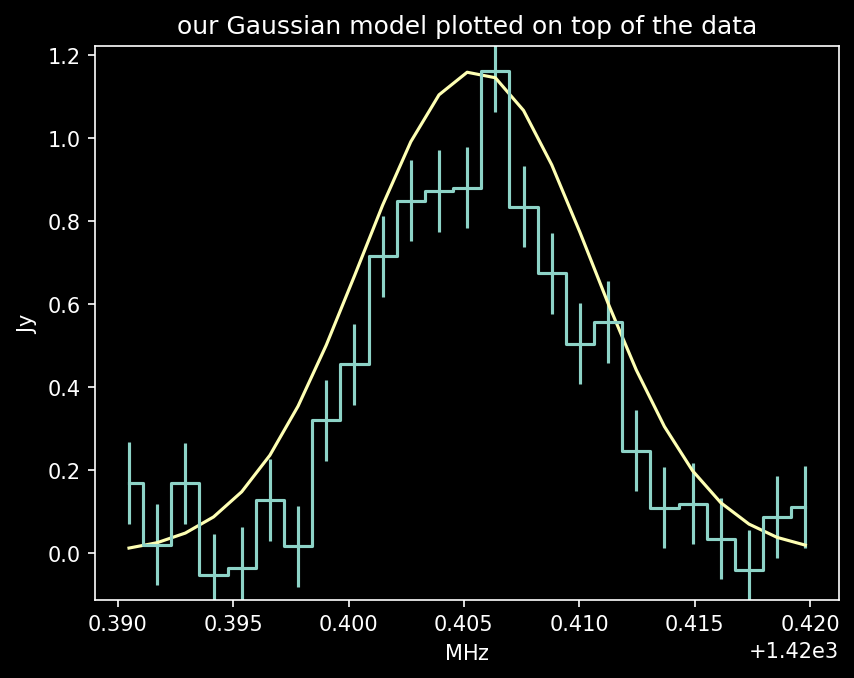

In [33]:
pl.errorbar(frequency_axis[selection], noisy_model_profile[selection].value,
            drawstyle='steps-mid', yerr=noise_estimate.value)
pl.plot(frequency_axis[selection], guess_gaussian(frequency_axis[selection]))
pl.title("our Gaussian model plotted on top of the data");

# Fitting

We now want to *fit* the model: we want to use an automated algorithm to find the best-matching set of parameters for the Gaussian.

In [34]:
# import the Levenberg-Marquardt Least Squares Model Fitter
from astropy.modeling.fitting import LevMarLSQFitter
fitter = LevMarLSQFitter()
fitted_gaussian = fitter(guess_gaussian, frequency_axis, noisy_model_profile,
                         weights=1/noise_estimate)
fitted_gaussian

<Gaussian1D(amplitude=1.00337362 Jy, mean=1420.40555747 MHz, stddev=0.00418435 MHz)>

## Aside: Which fitter?

In 2024, there's [an argument](https://github.com/astropy/astropy/issues/16607) to move to `LMLSQFitter`, which is a different implementation fo the same thing.

In [35]:
# import the _other_ Levenberg-Marquardt Least Squares Model Fitter
from astropy.modeling.fitting import LMLSQFitter
lmlfitter = LMLSQFitter(calc_uncertainties=True)
fitted_gaussian_lml = lmlfitter(guess_gaussian, frequency_axis, noisy_model_profile,
                         weights=1/noise_estimate)
fitted_gaussian_lml

<Gaussian1D(amplitude=1.00343986 Jy, mean=1420.40555768 MHz, stddev=0.0041838 MHz)>

# Fitting
Now that we've found the fit, let's look at how well it did:

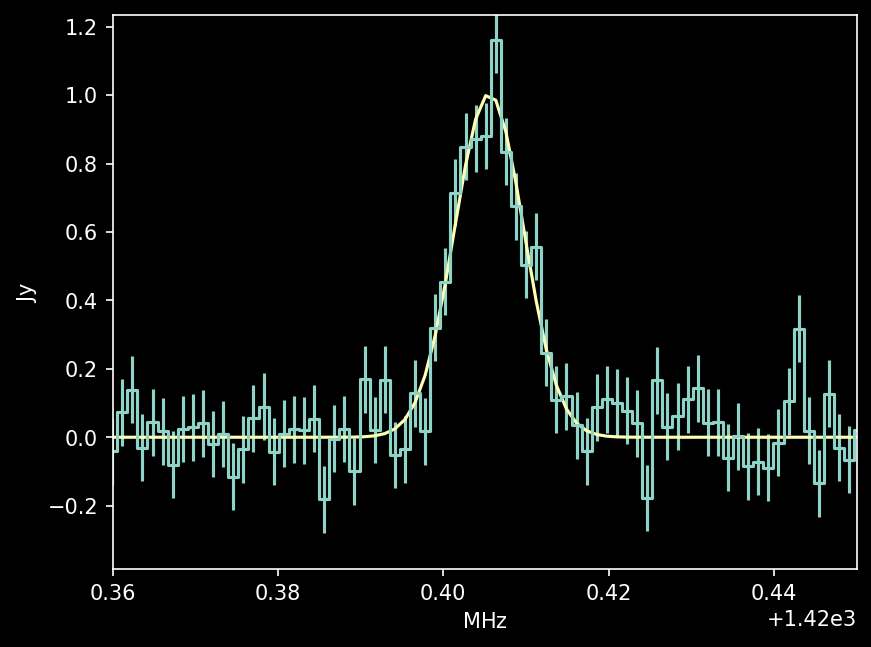

In [36]:
pl.errorbar(frequency_axis, noisy_model_profile.value,
            drawstyle='steps-mid', yerr=noise_estimate.value)
pl.plot(frequency_axis, fitted_gaussian(frequency_axis))
pl.xlim(1420.36,1420.45);

# Fitting: Good enough?

How do we determine if the fit is good enough?  One good way is to look at the residuals.

Residuals are the *data* minus the *model*:

In [37]:
model = fitted_gaussian(frequency_axis)

residual = noisy_model_profile - model

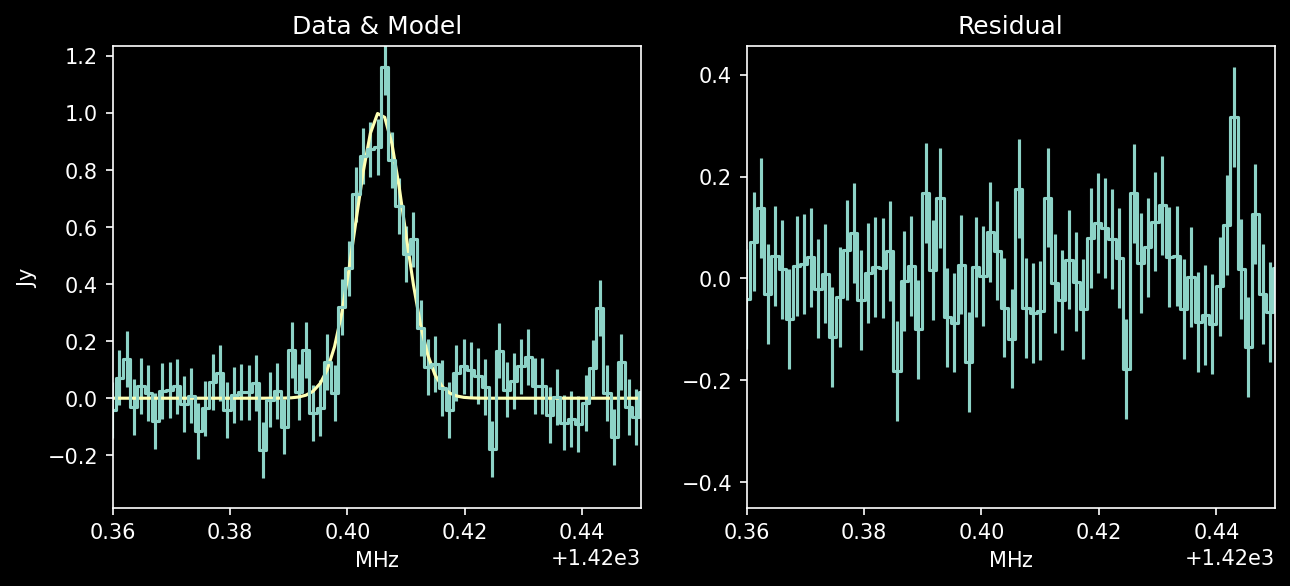

In [38]:
pl.figure(figsize=(10,4))
pl.subplot(1,2,1).errorbar(frequency_axis, noisy_model_profile.value,
            drawstyle='steps-mid', yerr=noise_estimate.value)
pl.plot(frequency_axis, fitted_gaussian(frequency_axis))
pl.title("Data & Model")
pl.xlim(1420.36,1420.45)
pl.subplot(1,2,2).errorbar(frequency_axis, residual.value,
            drawstyle='steps-mid', yerr=noise_estimate.value)
pl.title("Residual")
pl.xlim(1420.36,1420.45);

# Uncertainty?

The Levenberg-Marquardt fitter gives us an estimate of the parameter uncertainty too, via the covariance matrix:

In [39]:
print(fitter.fit_info['param_cov'])

[[ 2.36307175e-03  1.01164899e-17 -6.56559180e-06]
 [ 1.01164899e-17  5.47257979e-08 -2.97900676e-20]
 [-6.56559180e-06 -2.97900676e-20  5.47257979e-08]]


The diagonal of this matrix is the variance of the *amplitude*, *mean* (centroid, moment 1), and *Gaussian standard deviation* (sigma, width):

In [40]:
print(f"Peak is {fitted_gaussian.amplitude.value} +/-"
      f" {fitter.fit_info['param_cov'][0,0]**0.5}")

Peak is 1.0033736158788507 +/- 0.048611436436526476


In [41]:
print(f"Centroid is {fitted_gaussian.mean.value} +/-"
      f" {fitter.fit_info['param_cov'][1,1]**0.5}")

Centroid is 1420.4055574725355 +/- 0.0002339354567105725


In [42]:
print(f"Width is {fitted_gaussian.stddev.value} +/-"
      f" {fitter.fit_info['param_cov'][2,2]**0.5}")

Width is 0.004184349993521919 +/- 0.00023393545671128823


# How do these compare to the moment-based fits?

Close, but not exact.

In [43]:
print(f"Centroid is {fitted_gaussian.mean.value:0.5f} +/- {fitter.fit_info['param_cov'][1,1]**0.5:0.5f}")
print(f"Width is {fitted_gaussian.stddev.value:0.5f} +/- {fitter.fit_info['param_cov'][2,2]**0.5:0.5f}")
print()
print(f"m1 = {noisy_moment1:0.5f} +/- {noisy_moment1_uncertainty:0.5f}")
print(f"sqrt(m2) = {noisy_moment2**0.5:0.5f} +/- {noisy_moment2_uncertainty**0.5:0.5f}")

Centroid is 1420.40556 +/- 0.00023
Width is 0.00418 +/- 0.00023

m1 = 1420.40552 MHz +/- 0.00048 MHz
sqrt(m2) = 0.00500 MHz +/- 0.00239 MHz


# The remaining slides should be saved for after the radio astronomy lectures

# Model Fitting - How do we handle baselines?

I noted above that bad baselines are an issue.  

For most baseline problems, you can select down a local region and fit a line around that


We're going to walk through a practical example, where I'm going to show you some fitting *with mistakes included*.  If you reference this lecture, remember that!  I'm showing you how to evaluate mistakes as you work - so don't copy & paste the mistakes!

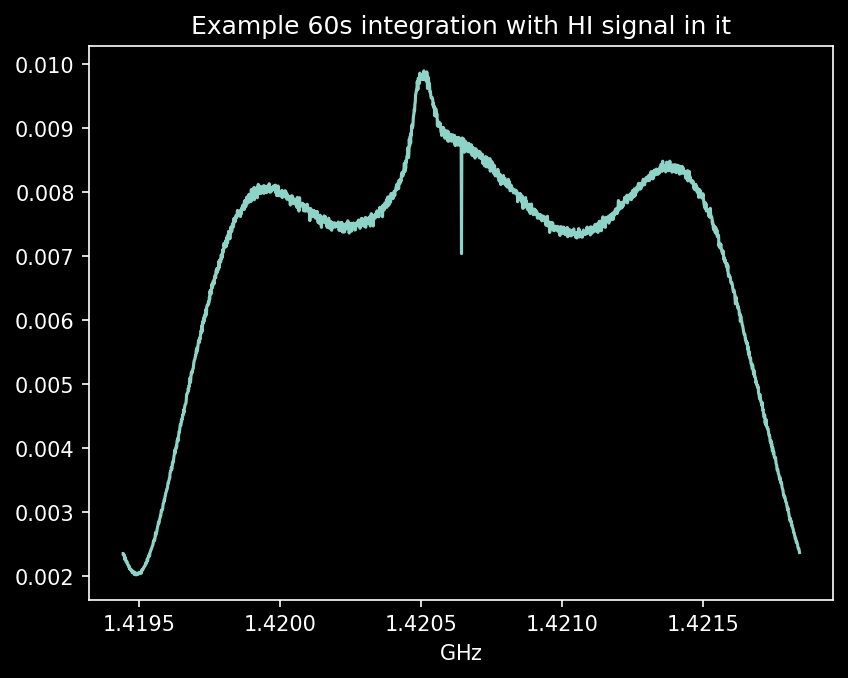

In [44]:
# our data
tbl = table.Table.read('data/psd_200725_100309_tint60s_sdr0_fsw.fits')
frq = (tbl['freq1']*u.Hz).to(u.GHz)
powr = tbl['power1']
pl.title("Example 60s integration with HI signal in it")
pl.plot(frq, powr);

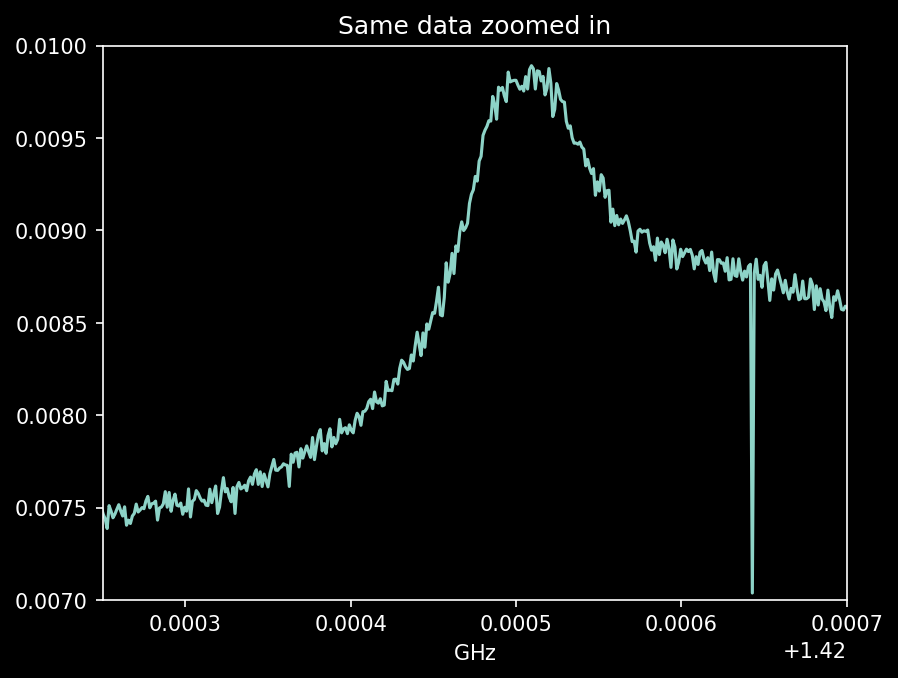

In [45]:
# zoom in on the line
pl.plot(frq.to(u.GHz), powr)
pl.axis((1.42025*u.GHz, 1.4207*u.GHz, 0.007, 0.01));
pl.title("Same data zoomed in");

We can eyeball a linear fit to this.... it won't be good, but it will be OK:

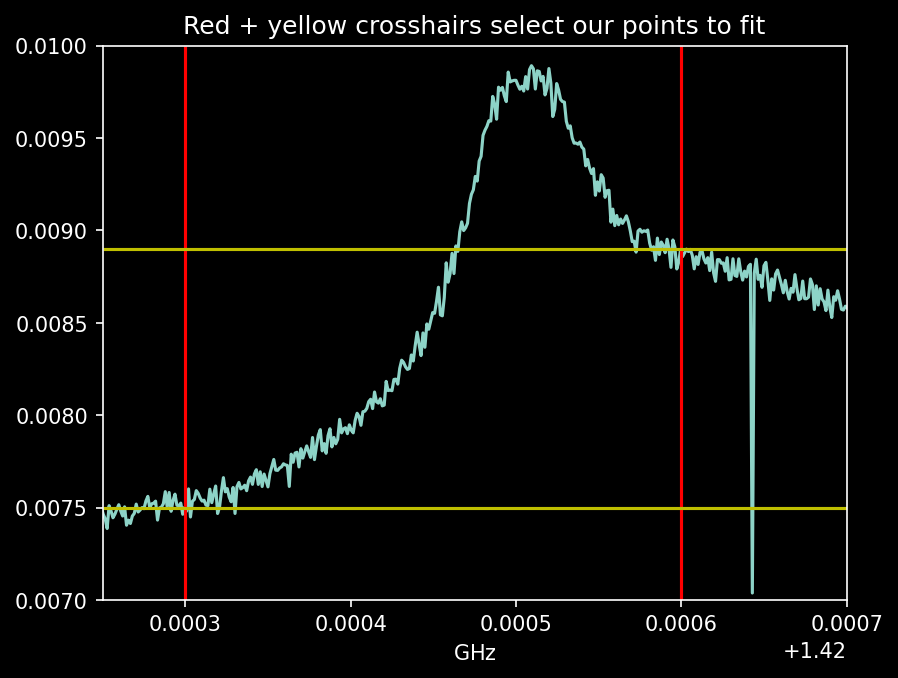

In [46]:
# let's find some approximate positions that are not part of the line...
pl.plot(frq.to(u.GHz), powr)
pl.vlines([1.4203, 1.4206]*u.GHz, 0.007, 0.01, color='r')
pl.hlines([0.0075, 0.0089], 1.42025*u.GHz, 1.4207*u.GHz, color='y')
pl.axis((1.42025*u.GHz, 1.4207*u.GHz, 0.007, 0.01))
pl.title("Red + yellow crosshairs select our points to fit");

Two points make a line... ($y = m x + b$)

In [47]:
slope = (0.0089 - 0.0075) / ((1.4206 - 1.4203)*u.GHz)
intercept = 0.0089 - slope * 1.4206*u.GHz
baseline_model = frq*slope + intercept

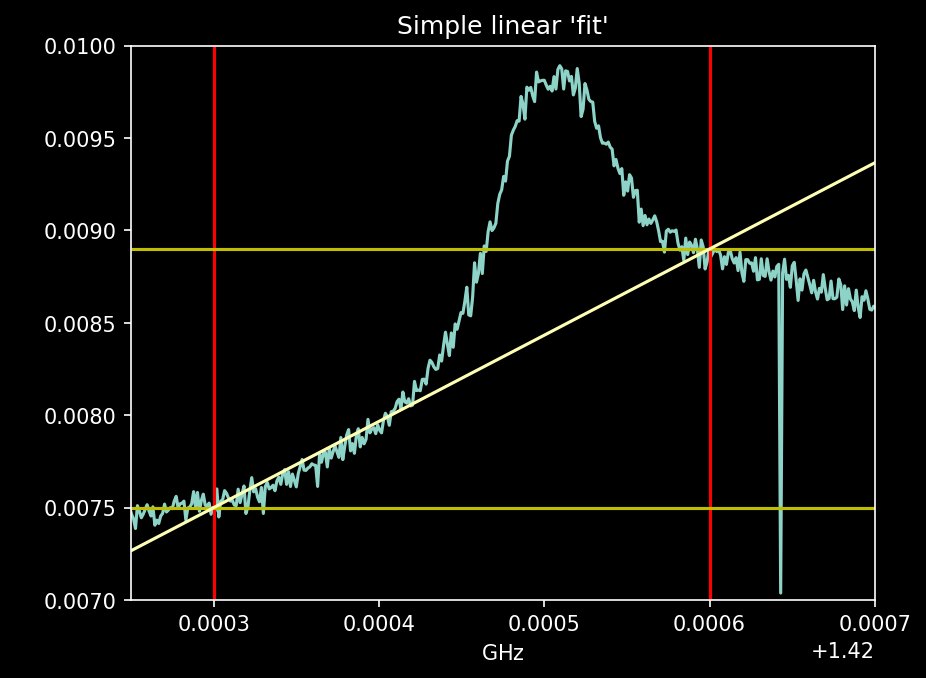

In [48]:
# show our "fit"
pl.plot(frq.to(u.GHz), powr)
pl.vlines([1.4203, 1.4206]*u.GHz, 0.007, 0.01, color='r')
pl.hlines([0.0075, 0.0089], 1.42025*u.GHz, 1.4207*u.GHz, color='y')
pl.axis((1.42025*u.GHz, 1.4207*u.GHz, 0.007, 0.01))
pl.plot(frq, baseline_model);
pl.title("Simple linear 'fit'");

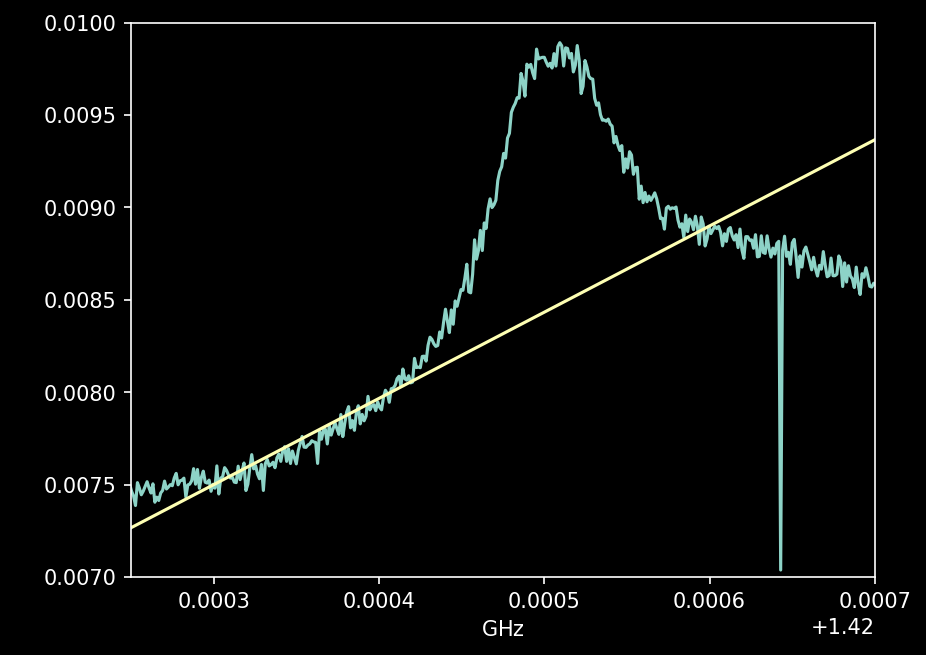

In [49]:
pl.plot(frq.to(u.GHz), powr)
pl.axis((1.42025*u.GHz, 1.4207*u.GHz, 0.007, 0.01))
pl.plot(frq, baseline_model);

We can now remove the baseline and see how that looks...

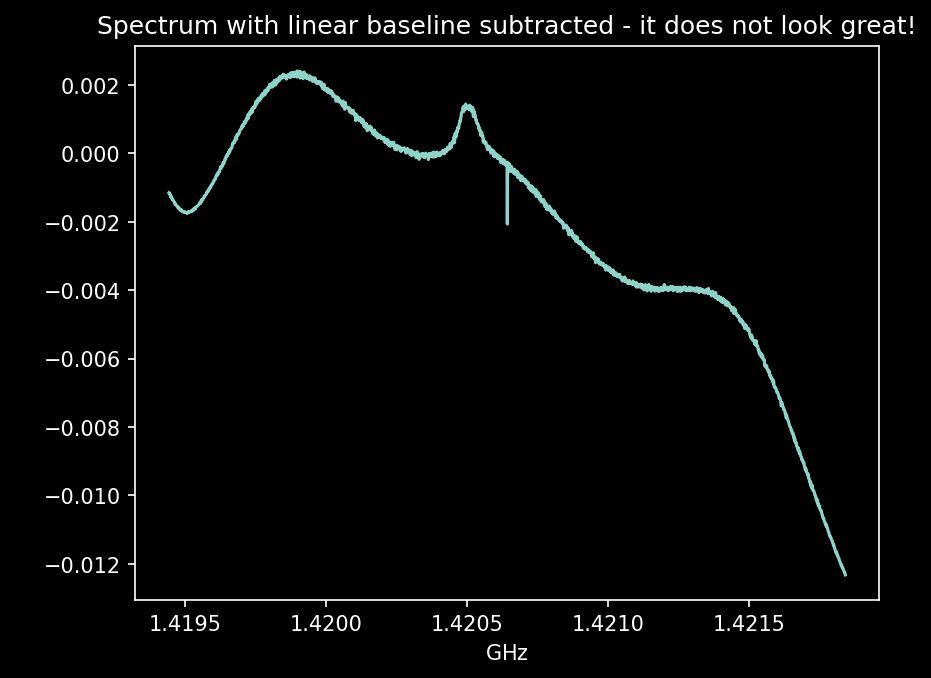

In [50]:
# Overall, this looks kinda bad....
blsub_powr = powr - baseline_model
pl.plot(frq.to(u.GHz), blsub_powr)
pl.title("Spectrum with linear baseline subtracted - it does not look great!");

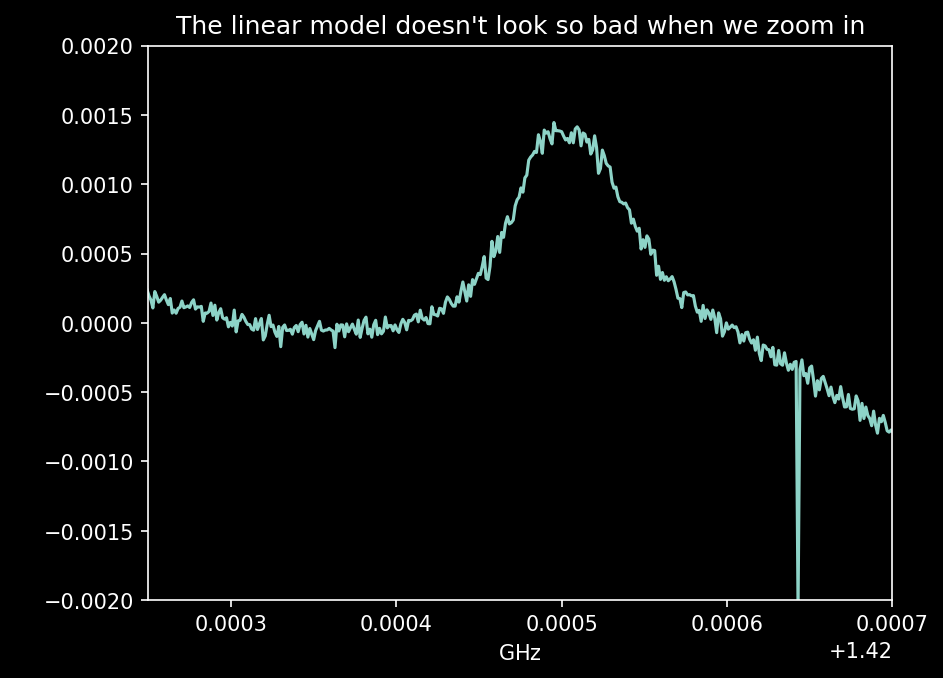

In [51]:
# but if we zoom in, hey, not so bad!!
pl.plot(frq.to(u.GHz), blsub_powr)
pl.xlim(1.42025*u.GHz, 1.4207*u.GHz)
pl.ylim(-0.002, 0.002)
pl.title("The linear model doesn't look so bad when we zoom in");

We can fit a Gaussian to this now (we could not have before!!)

We need to put in some guesses.  This time, we'll eyeball them again...

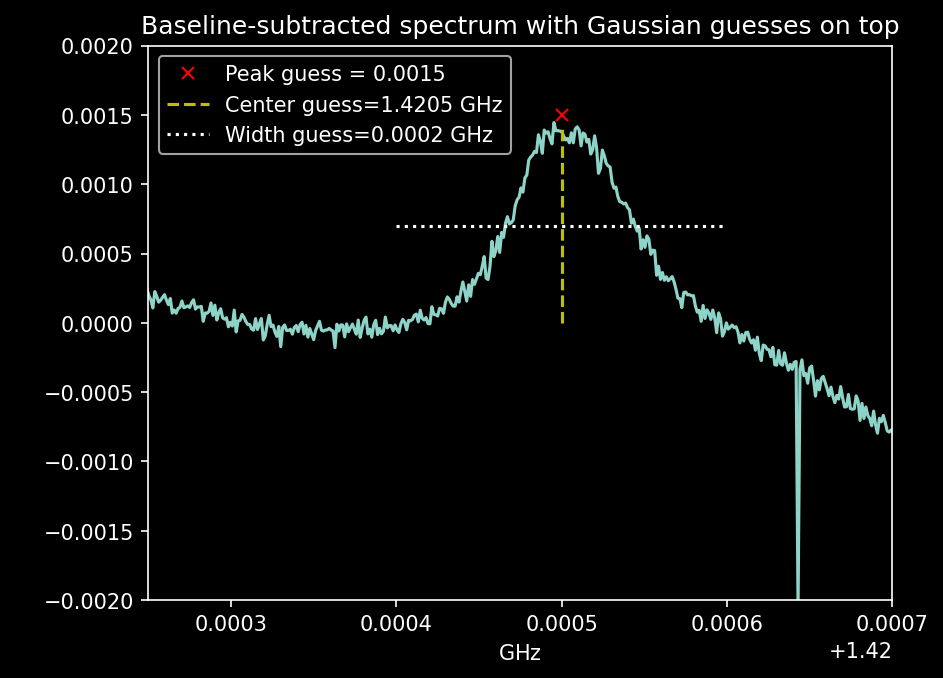

In [52]:
pl.plot(frq.to(u.GHz), blsub_powr)
pl.xlim(1.42025*u.GHz, 1.4207*u.GHz)
pl.ylim(-0.002, 0.002)
pl.plot(1.4205*u.GHz, 0.0015, 'rx', label='Peak guess = 0.0015')
pl.vlines(1.4205*u.GHz, 0, 0.0014, color='y', linestyle='--', label='Center guess=1.4205 GHz')
pl.hlines(0.0007, 1.4204*u.GHz, 1.4206*u.GHz, color='w', linestyle=':', label="Width guess=0.0002 GHz")
pl.legend(loc='best')
pl.title("Baseline-subtracted spectrum with Gaussian guesses on top");

In [53]:
guess_gaussian = Gaussian1D(amplitude=0.0015,
                            mean=1.4205*u.GHz,
                            stddev=0.0002*u.GHz,
                           )
guess_gaussian

<Gaussian1D(amplitude=0.0015, mean=1.4205 GHz, stddev=0.0002 GHz)>

In [54]:
fitted_gaussian = fitter(guess_gaussian, frq, blsub_powr)
fitted_gaussian

<Gaussian1D(amplitude=0.00074854 , mean=1.42024623 GHz, stddev=0. GHz)>

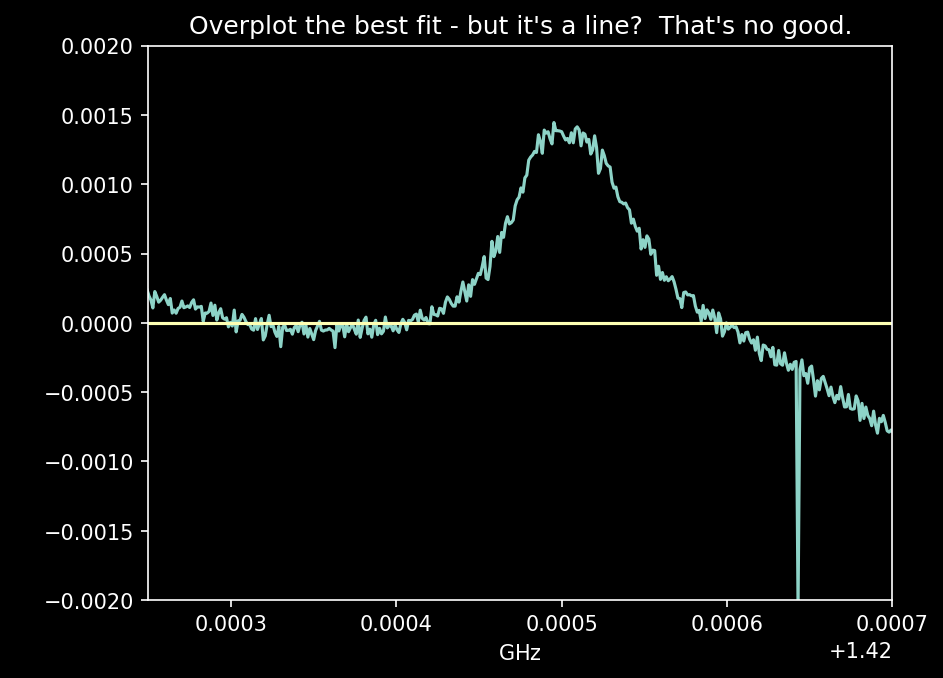

In [55]:
# uh oh! no good!
pl.plot(frq.to(u.GHz), blsub_powr)
pl.plot(frq, fitted_gaussian(frq))
pl.xlim(1.42025*u.GHz, 1.4207*u.GHz)
pl.ylim(-0.002, 0.002)
pl.title("Overplot the best fit - but it's a line?  That's no good.");

Because so much of the spectrum is not good - we only have a decent linear baseline near the line - we need to exclude the rest.  This is the "data selection" approach from before

In [56]:
selection = (frq > 1.4203*u.GHz) & (frq < 1.4207*u.GHz)

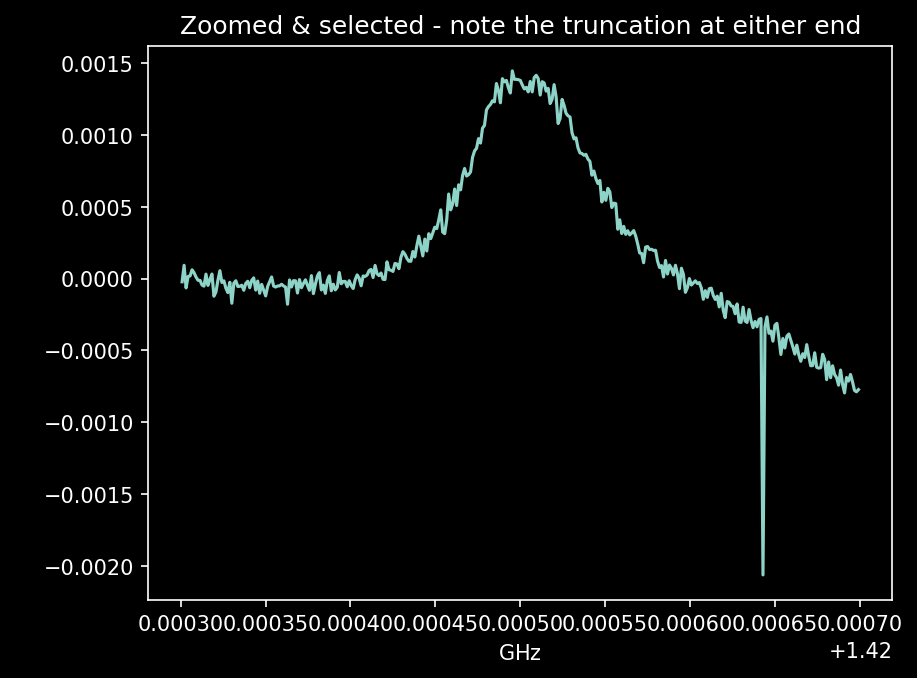

In [57]:
pl.plot(frq[selection], blsub_powr[selection])
pl.title("Zoomed & selected - note the truncation at either end");

In [58]:
guess_gaussian

<Gaussian1D(amplitude=0.0015, mean=1.4205 GHz, stddev=0.0002 GHz)>

In [59]:
fitted_gaussian = fitter(guess_gaussian, frq[selection], blsub_powr[selection])
fitted_gaussian

<Gaussian1D(amplitude=0.00075683 , mean=1.42046677 GHz, stddev=0. GHz)>

Wait, it still didn't work?  What's going wrong now?

Well,  lets look at our guess:

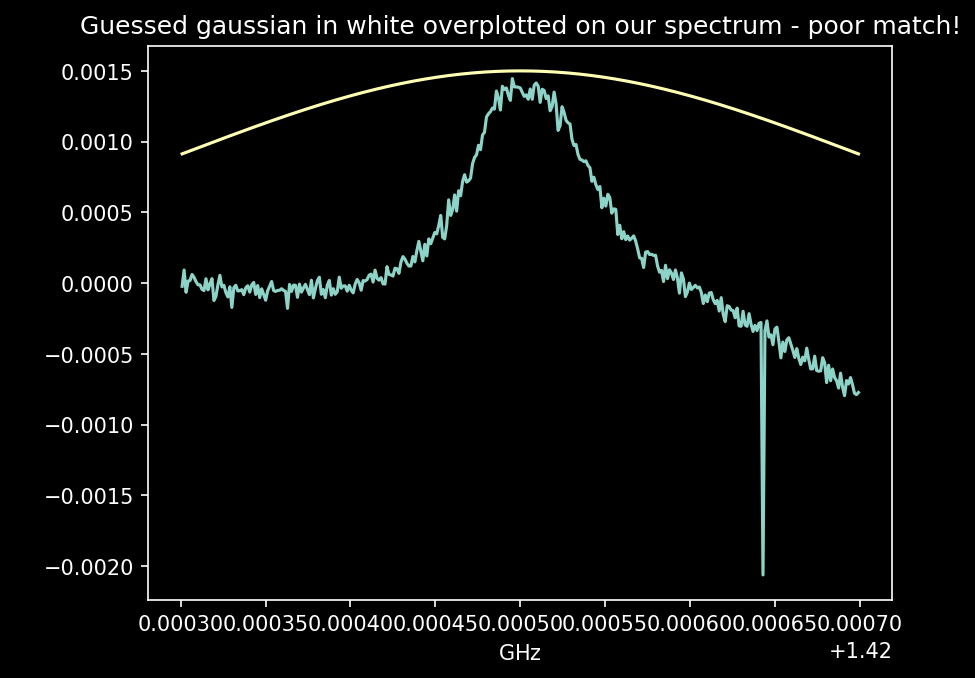

In [60]:
pl.plot(frq[selection], blsub_powr[selection])
pl.plot(frq[selection], guess_gaussian(frq[selection]))
pl.title("Guessed gaussian in white overplotted on our spectrum - poor match!");

The guess is clearly too wide!  I actually made a mistake - the width we were supposed to guess is 0.0001 GHz, not 0.0002!  (the full width, plotted, is 0.0002 GHz, but $\sigma$ is a half-width)

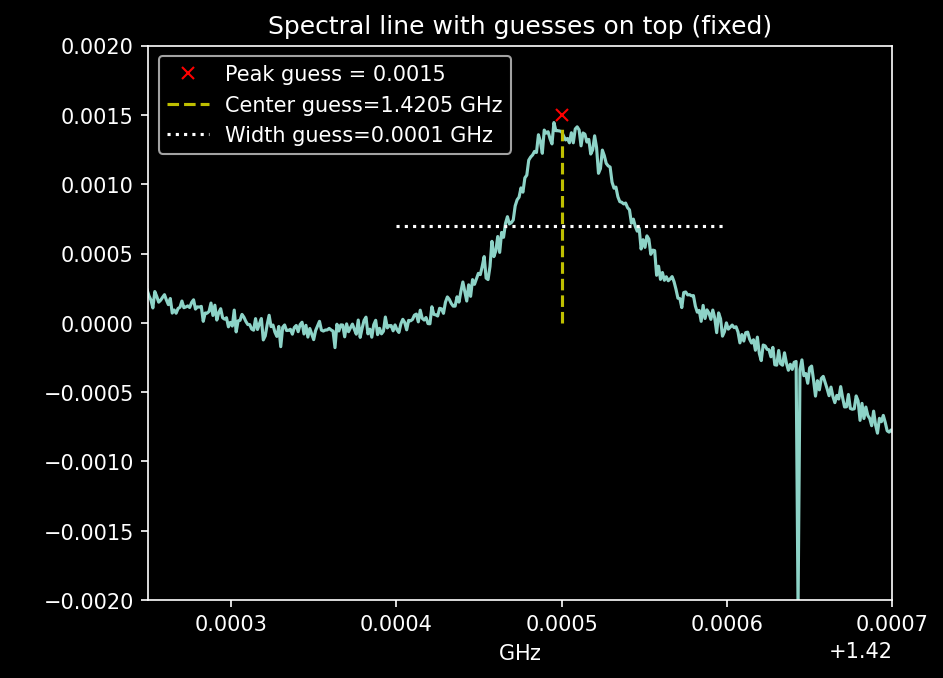

In [61]:
# This is where I overestimated the width: I put in 0.0002,
# which is the *full width*, but the guess is the *half-width*
pl.plot(frq.to(u.GHz), blsub_powr)
pl.xlim(1.42025*u.GHz, 1.4207*u.GHz)
pl.ylim(-0.002, 0.002)
pl.plot(1.4205*u.GHz, 0.0015, 'rx', label='Peak guess = 0.0015')
pl.vlines(1.4205*u.GHz, 0, 0.0014, color='y', linestyle='--', label='Center guess=1.4205 GHz')
pl.hlines(0.0007, 1.4204*u.GHz, 1.4206*u.GHz, color='w', linestyle=':', label="Width guess=0.0001 GHz")
pl.legend(loc='best')
pl.title("Spectral line with guesses on top (fixed)");

In [62]:
guess_gaussian = Gaussian1D(amplitude=0.0015,
                            mean=1.4205*u.GHz,
                            stddev=0.0001*u.GHz,
                           )
guess_gaussian

<Gaussian1D(amplitude=0.0015, mean=1.4205 GHz, stddev=0.0001 GHz)>

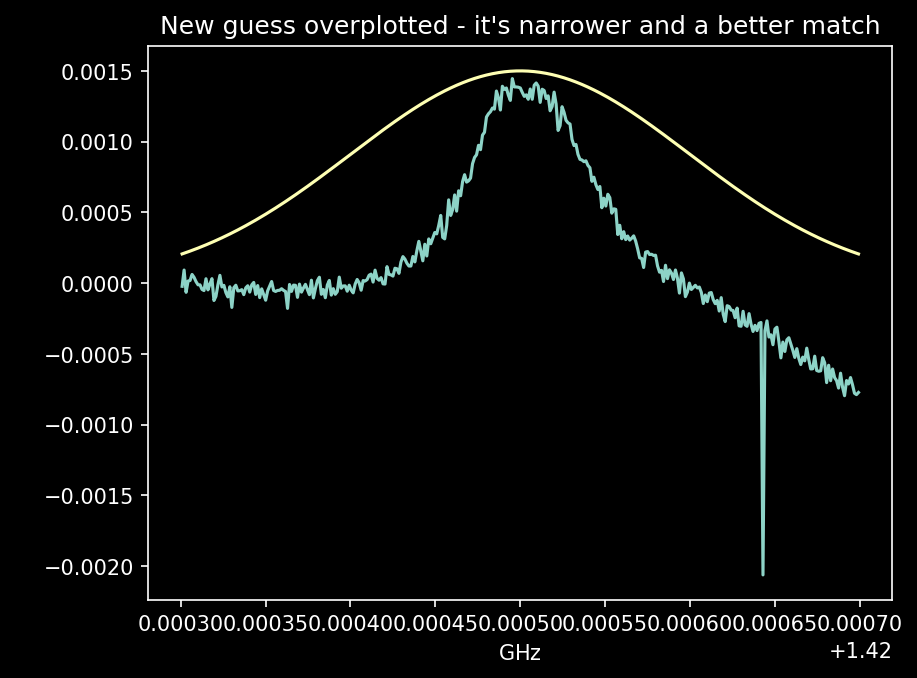

In [63]:
pl.plot(frq[selection], blsub_powr[selection])
pl.plot(frq[selection], guess_gaussian(frq[selection]))
pl.title("New guess overplotted - it's narrower and a better match");

Still a bit wide... 

In [64]:
guess_gaussian = Gaussian1D(amplitude=0.0015,
                            mean=1.4205*u.GHz,
                            stddev=0.00005*u.GHz,
                           )
guess_gaussian

<Gaussian1D(amplitude=0.0015, mean=1.4205 GHz, stddev=0.00005 GHz)>

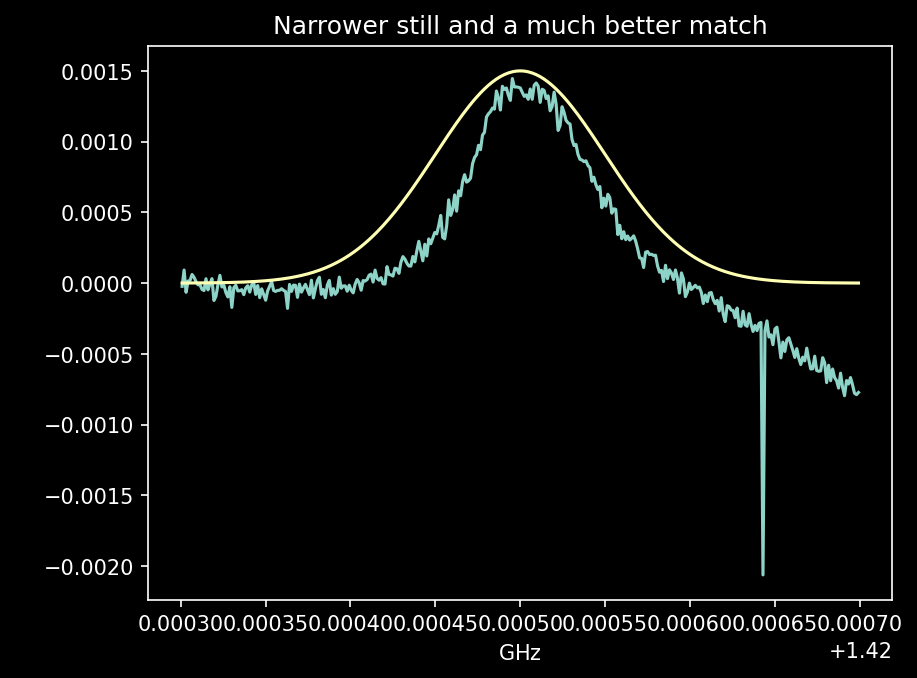

In [65]:
pl.plot(frq[selection], blsub_powr[selection])
pl.plot(frq[selection], guess_gaussian(frq[selection]))
pl.title("Narrower still and a much better match");

Now that the guess is reasonably close, we can try to fit again...

In [66]:
fitted_gaussian = fitter(guess_gaussian, frq[selection], blsub_powr[selection])
fitted_gaussian

<Gaussian1D(amplitude=0.00140884 , mean=1.42050496 GHz, stddev=0.0000332 GHz)>

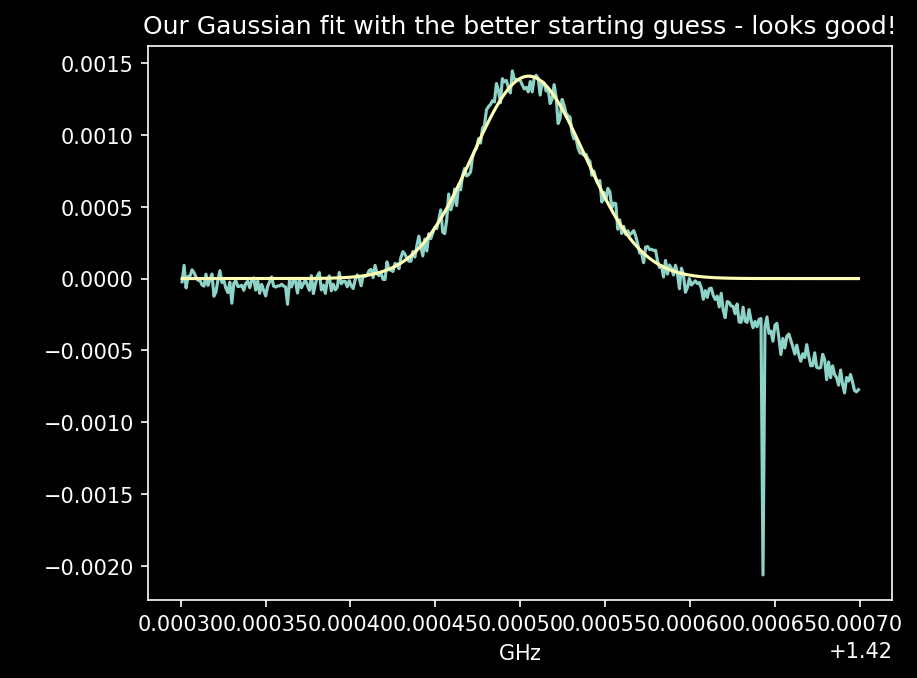

In [67]:
# nice fit!
pl.plot(frq[selection], blsub_powr[selection])
pl.plot(frq[selection], fitted_gaussian(frq[selection]))
pl.title("Our Gaussian fit with the better starting guess - looks good!");

Let's check the residual...

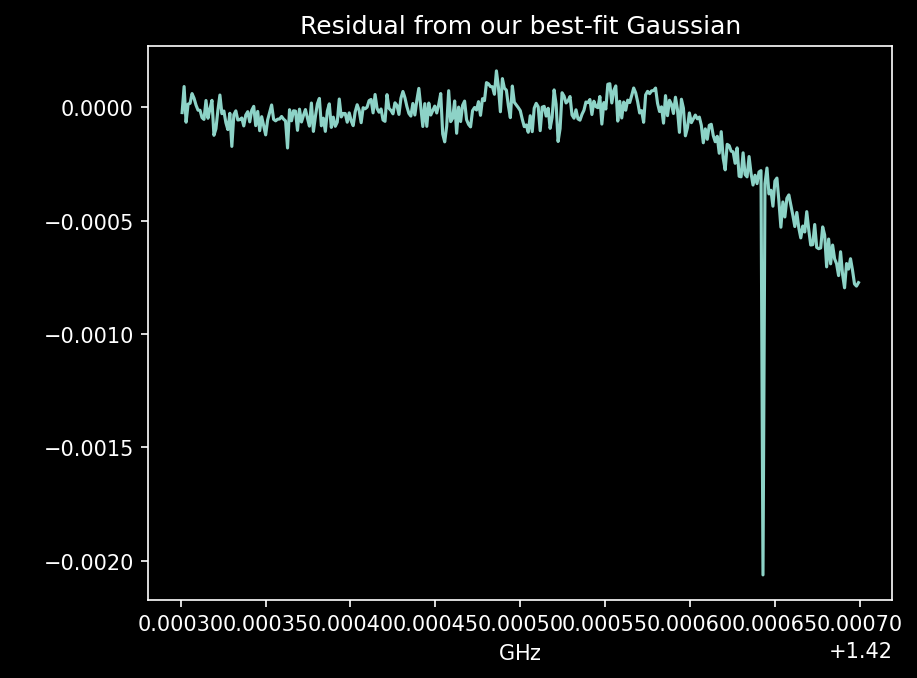

In [68]:
# flat residual, except for the dangling bit to the right
pl.plot(frq[selection], blsub_powr[selection] - fitted_gaussian(frq[selection]));
pl.title("Residual from our best-fit Gaussian");

These were real data.  What did we measure?

In [69]:
velocity = (nu_hi - fitted_gaussian.mean) / nu_hi * constants.c
print(velocity.to(u.km/u.s))

-20.939818444407752 km / s


We measured a line-of-sight velocity of -20.9 km/s!  OK, good start.

In [70]:
temperature_measured = (fitted_gaussian.stddev**2 * constants.c**2 * hydrogen_mass / (nu_hi**2 * constants.k_B)).to(u.K)
print(temperature_measured)

5904.191409803261 K


We see a temperature of 5900 K.  Is that really the temperature?  Probably not, hydrogen is usually ionized at these temperatures, but we need to bring in outside information to know that for sure.

What about the intensity?  We don't know what that means yet - we have to calibrate the data first.

# Baselining - revisited

We fit a linear baseline model to the data.

Can we do better?  These guys clearly had to:
<img src="images/41550_2020_1174_Fig9_ESM.webp" style="max-height:500px">

We can try fitting functions like higher-order polynomials (e.g., $y = c_0 + c_1 x + c_2 x^2 + c_3 x^3 +...$), or we can try to fit splines or use Gaussian Processes or.... lots of other options.

But, what if we could skip all of that?

We can freely tune the spectrograph to whatever frequency we want.

Changing the frequency doesn't change the shape of the "baseline" (at least, not much).

## Frequency Switching

Frequency-switched observations are a great way to remove the baselines.  You measure them directly!

Frequency-switching is changing your target frequency by a little bit - a small fraction of the bandwidth - between observations.

In [71]:
# in our data, we observe at two frequencies...
frq1 = (tbl['freq1']*u.Hz).to(u.GHz)
frq2 = (tbl['freq2']*u.Hz).to(u.GHz)
(frq2-frq1).to(u.kHz)

<Quantity [-474., -474., -474., ..., -474., -474., -474.] kHz>

Our second observation is 474 kHz separated from the first one, or...

In [72]:
((frq2-frq1).to(u.kHz) / nu_hi * constants.c).to(u.km/u.s)

<Quantity [-100.04298067, -100.04298067, -100.04298067, ..., -100.04298067,
           -100.04298067, -100.04298067] km / s>

100 km/s.

# Frequency-switched spectra

With frequency-switched spectra, we subtract one spectrum from the other to get rid of the baselines.

In [73]:
pow1 = tbl['power1']
pow2 = tbl['power2']

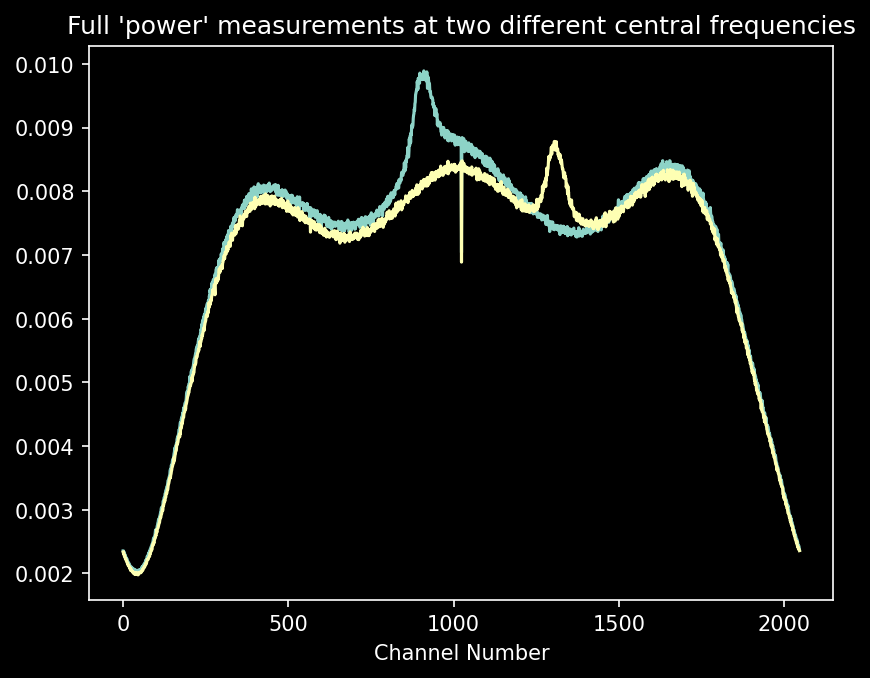

In [74]:
pl.plot(pow1)
pl.plot(pow2)
pl.xlabel("Channel Number")
pl.title("Full 'power' measurements at two different central frequencies");

But we recognize that the data are taken at different frequencies.  Note that, when we plot against the observed frequency, the spectral line aligns:

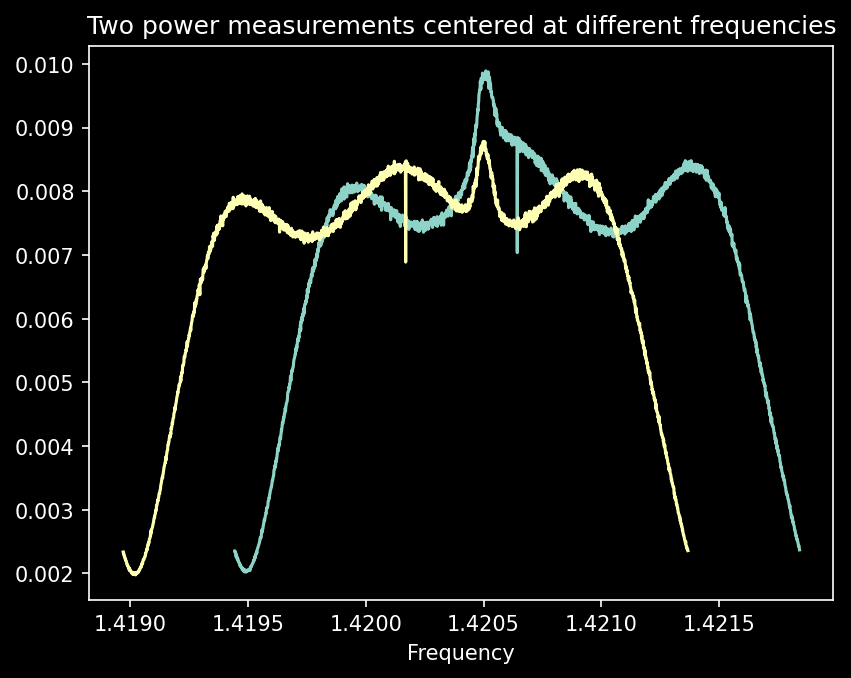

In [75]:
pl.plot(frq1, pow1)
pl.plot(frq2, pow2)
pl.xlabel("Frequency")
pl.title("Two power measurements centered at different frequencies");

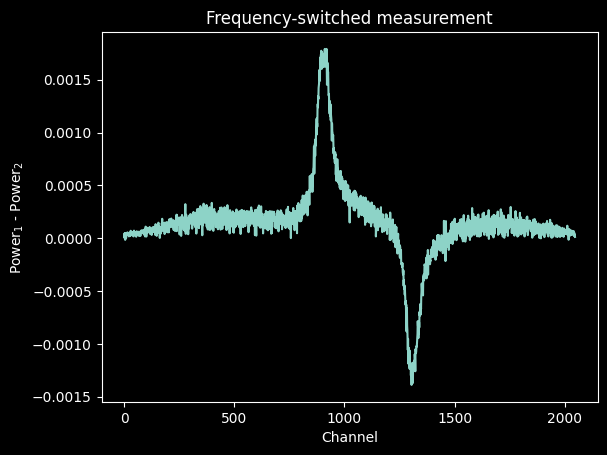

In [76]:
# our frequency-switched spectrum:
pl.figure(dpi=100) # need a smaller figure to fit the text below
pl.plot(pow1-pow2)
pl.xlabel("Channel")
pl.ylabel('Power$_1$ - Power$_2$')
pl.title("Frequency-switched measurement");

The frequency-switched spectrum has both a negative and a positive component!

Recall that we measured the line at -20 km/s.  That's the positive one.  The negative bit shows up at the "wrong" frequency, but we know exactly where it is (it's wrong by 100 km/s)

This new spectrum has a super nice, flat profile.  It's not *perfect*, but it's good

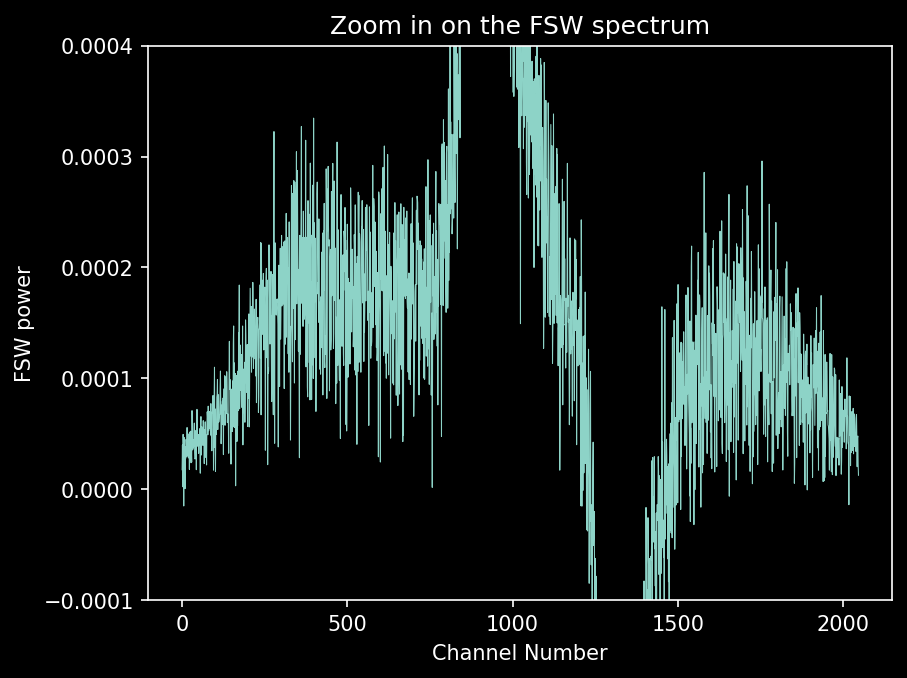

In [77]:
pl.plot(pow1-pow2, linewidth=0.5,)
pl.ylim(-0.0001,0.0004)
pl.xlabel('Channel Number')
pl.ylabel("FSW power")
pl.title("Zoom in on the FSW spectrum");

We can now fit to this spectrum:

In [78]:
fsw_pow = pow1 - pow2
fitted_gaussian = fitter(guess_gaussian, frq1[selection], fsw_pow[selection])
fitted_gaussian

<Gaussian1D(amplitude=0.00150347, mean=1.42051139 GHz, stddev=0.00005926 GHz)>

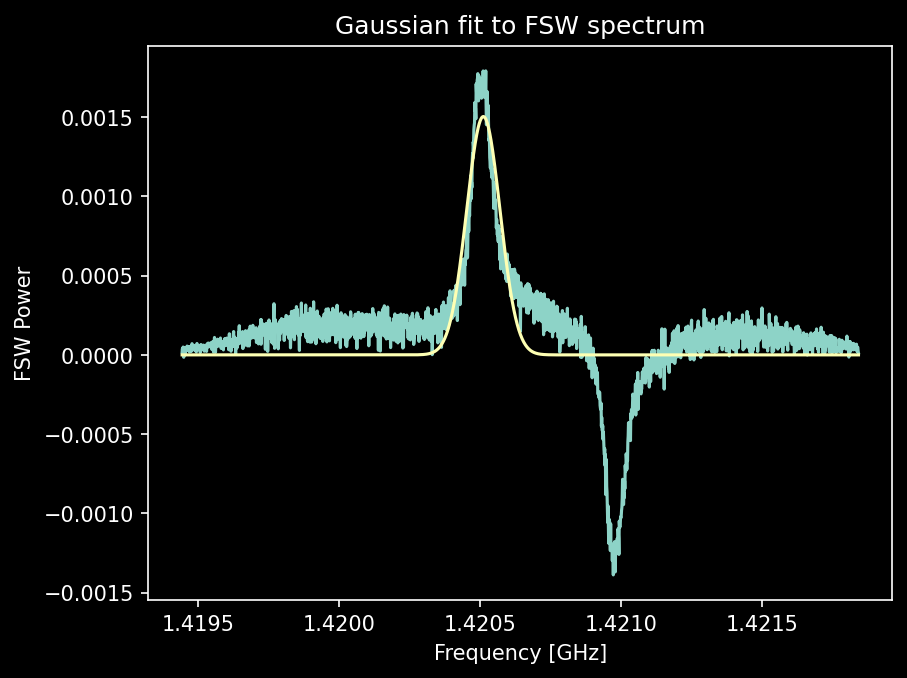

In [79]:
pl.plot(frq1, fsw_pow)
pl.plot(frq1, fitted_gaussian(frq1))
pl.xlabel("Frequency [GHz]")
pl.ylabel("FSW Power")
pl.title("Gaussian fit to FSW spectrum");

In [80]:
guess_gaussian.mean = 1.42099*u.GHz
guess_gaussian.amplitude = -0.0015
fitted_gaussian = fitter(guess_gaussian, frq1, fsw_pow)
fitted_gaussian

<Gaussian1D(amplitude=-0.00124219, mean=1.42098092 GHz, stddev=0.0000352 GHz)>

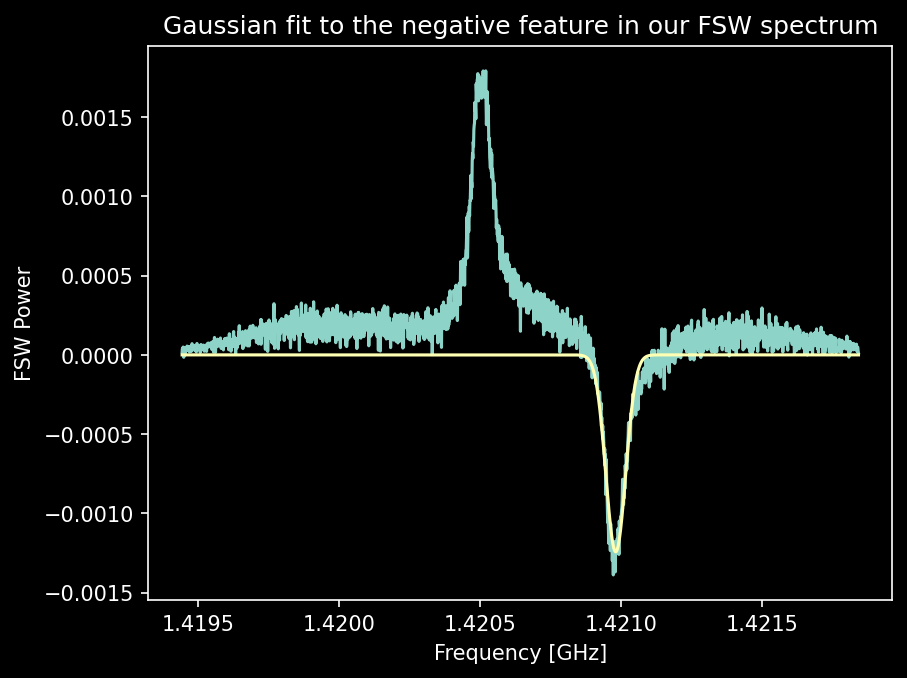

In [81]:
pl.plot(frq1, fsw_pow)
pl.plot(frq1, fitted_gaussian(frq1))
pl.xlabel("Frequency [GHz]")
pl.ylabel("FSW Power")
pl.title("Gaussian fit to the negative feature in our FSW spectrum");

# Frequency Switching

We can average these lines together to get a signal-to-noise boost of $\sqrt{2}$, which makes up for the fact that we spent only half as much time integrating at each frequency.

The advantages of frequency switching are clear: it gets rid of "baselines"!



It can fail, though: If your target line is too broad, you have to do a big frequency switch to prevent the positive and negative parts from overlapping.

The further apart your two observations are (in frequency or in time), the worse the baseline subtraction will be; baselines vary with time, frequency, and sometimes even with the intensity of the source you're looking at.  The sun will probably produce slightly differently-shaped baselines than off-sun.

# Uncertainty and noise

We have gotten this far with our real data without talking about the noise.  How do we infer it?

Generally, we can only estimate the pixel-to-pixel variation in the spectrum, or the spectrum-to-spectrum variation.  We have to estimate the noise, we can't compute it from first principles because there are too many unknowns about the system.

# Measuring the uncertainty

We can simply take a signal-free portion of the spectrum and use it to infer the local noise by taking the standard deviation:

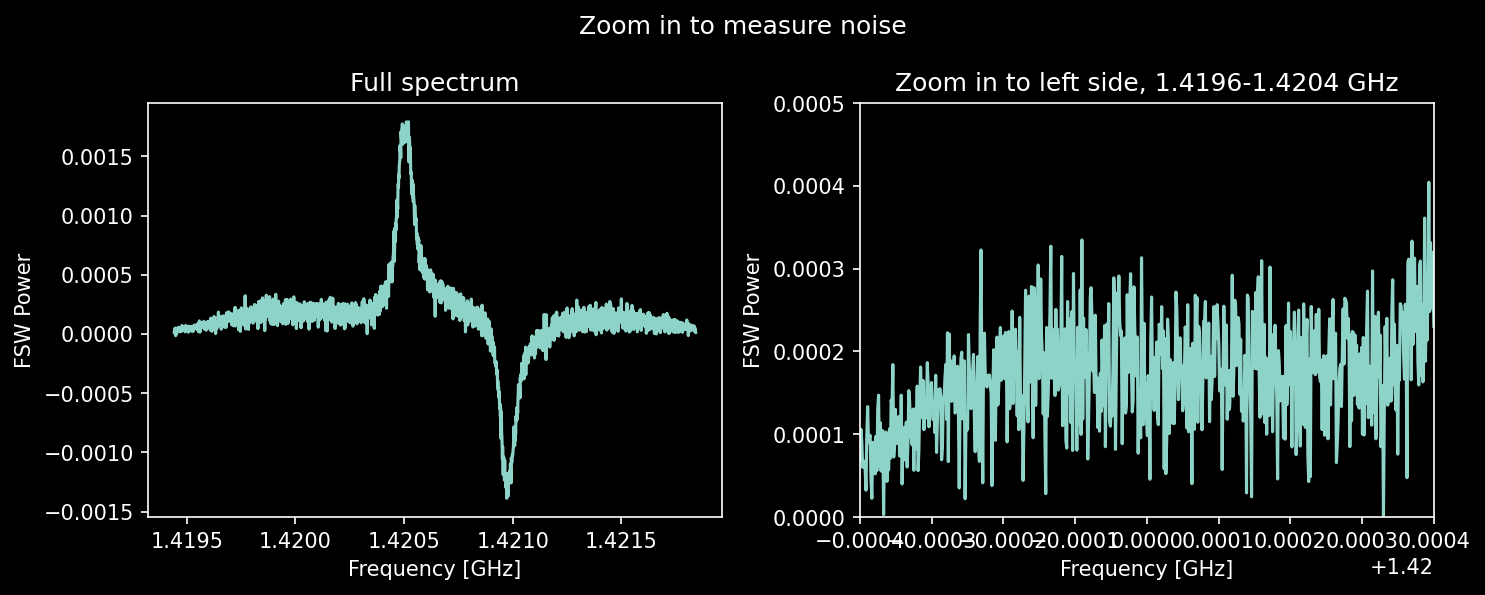

In [82]:
pl.figure(figsize=(10,4))
pl.subplot(1,2,1).plot(frq1, fsw_pow)
pl.xlabel("Frequency [GHz]")
pl.ylabel("FSW Power")
pl.title("Full spectrum")
pl.subplot(1,2,2).plot(frq1, fsw_pow)
pl.xlabel("Frequency [GHz]")
pl.ylabel("FSW Power")
pl.axis((1.4196*u.GHz, 1.4204*u.GHz, 0, 0.0005))
pl.suptitle("Zoom in to measure noise")
pl.title("Zoom in to left side, 1.4196-1.4204 GHz");
pl.tight_layout();

In [83]:
selection_for_noise = (frq1 > 1.4196*u.GHz) & (frq1 < 1.4204*u.GHz)

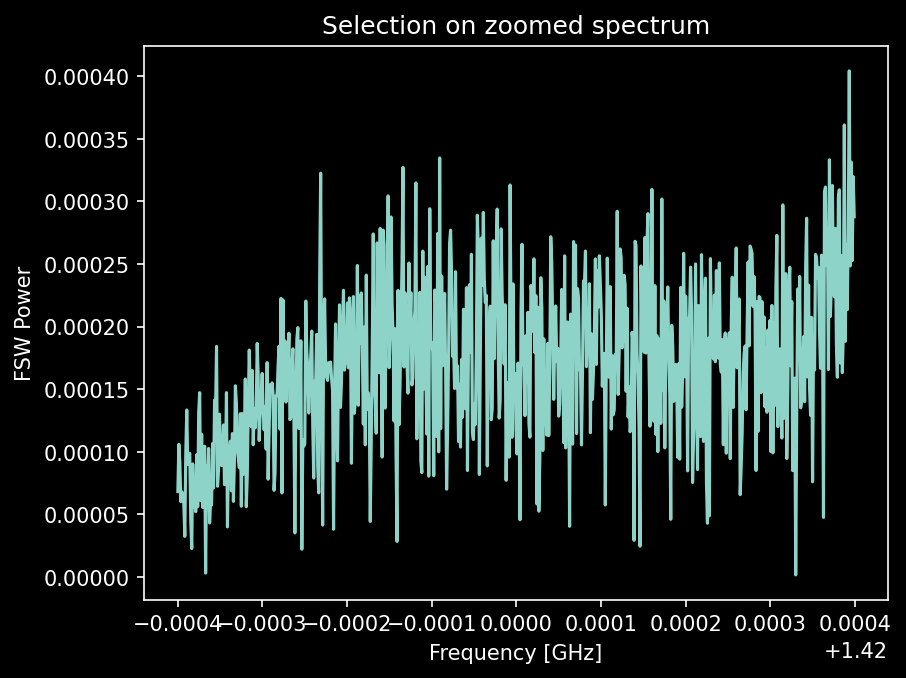

In [84]:
pl.plot(frq1[selection_for_noise], fsw_pow[selection_for_noise])
pl.xlabel("Frequency [GHz]")
pl.ylabel("FSW Power")
pl.title("Selection on zoomed spectrum");

In [85]:
noise_estimate2 = np.std(fsw_pow[selection_for_noise])
print(noise_estimate2)

6.539806569313538e-05


We can use this noise estimate when computing our fit and errors on the fit and thereby get error estimates on the fit parameters:

In [86]:
guess_gaussian = Gaussian1D(amplitude=0.0015, mean=1.4205*u.GHz, stddev=0.0001*u.GHz)
fitted_gaussian = fitter(guess_gaussian, frq1[selection], fsw_pow[selection], weights=1/noise_estimate2)
fitted_gaussian

<Gaussian1D(amplitude=0.00150217, mean=1.42051142 GHz, stddev=0.00005936 GHz)>

In [87]:
print(f"Centroid is {fitted_gaussian.mean.value} +/- {fitter.fit_info['param_cov'][1,1]**0.5}")
print(f"Width is {fitted_gaussian.stddev.value} +/- {fitter.fit_info['param_cov'][2,2]**0.5}")

Centroid is 1.4205114157607268 +/- 3.8593613573056786e-07
Width is 5.935906597883401e-05 +/- 3.860920136832943e-07


# Estimating uncertainty
But be wary!  If you have a non-flat baseline, you cannot estimate uncertainty this way!

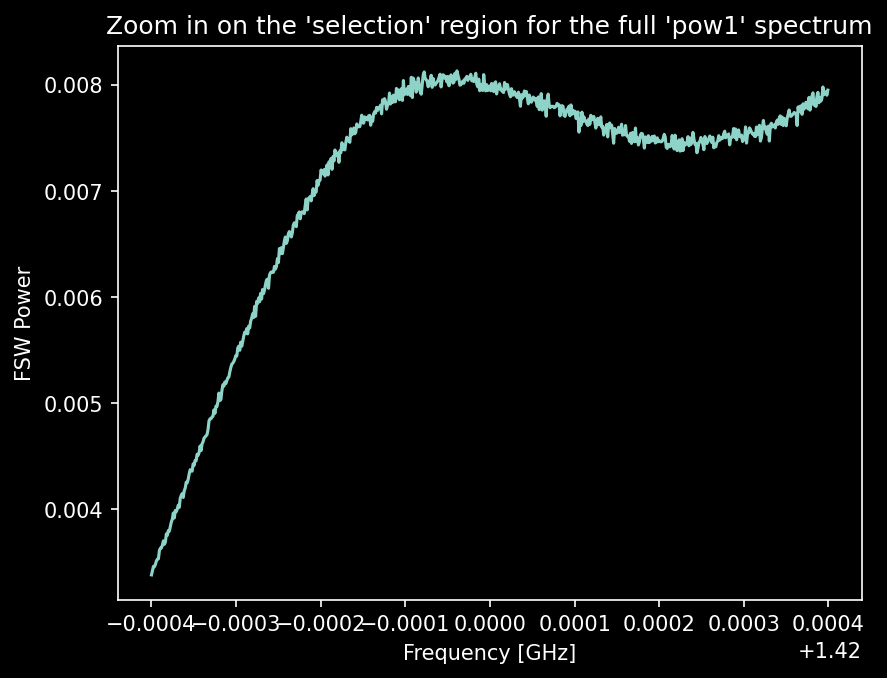

In [88]:
pl.plot(frq1[selection_for_noise], pow1[selection_for_noise])
pl.xlabel("Frequency [GHz]")
pl.ylabel("FSW Power")
pl.title("Zoom in on the 'selection' region for the full 'pow1' spectrum");

In [89]:
print(f"The non-fsw measurement has a standard deviation={pow1[selection_for_noise].std():0.4f}, "
      f"which is much bigger than the fsw measurement {fsw_pow[selection_for_noise].std():0.4g}")

The non-fsw measurement has a standard deviation=0.0012, which is much bigger than the fsw measurement 6.54e-05


## Measurement tools

You now have the tools in hand needed to:
 * Produce frequency-switched spectra
 * Measure moments of spectral lines
 * Measure the uncertainties on those moment measurements
 * Fit Gaussian line profiles to spectral lines
 * Fit baselines to enable fitting of Gaussian profiles
 


FIN